# Analysis
Now let's delve deeper into the analysis!

## Load DataFrames

In [1]:
# import things
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading in files
fb_congress_df = pd.read_pickle("pickle/fb_congress_df_part1.pkl")
fb_congress_df2 = pd.read_pickle("pickle/fb_congress_df_part2.pkl")

# merging them
fb_congress_df = fb_congress_df.append(fb_congress_df2)

In [3]:
# read in fb wiki
fb_wiki_df = pd.read_pickle("pickle/fb_wiki_df.pkl")

In [4]:
# read in fitocracy
fitocracy_df = pd.read_pickle("pickle/fitocracy_df.pkl")

In [5]:
# read in reddit
reddit_df = pd.read_pickle("pickle/reddit_df.pkl")

In [6]:
# read in ted
ted_responses_df = pd.read_pickle("pickle/ted_responses_df.pkl")

## Conduct basic analysis
Some of this information will be repetition from previous files, but I want to have it all in one place here.

### Analysis of Facebook Congress

In [7]:
fb_congress_df.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text
0,0,video,57265377,Roger Williams,Congress_Republican,M,Jerry,"Yesterday, my colleagues and I voted to protec...",Protecting birth is not the same as protecting...
1,0,video,57265377,Roger Williams,Congress_Republican,M,Andrea,"Yesterday, my colleagues and I voted to protec...",You need to protect children and leave my body...
2,0,video,57265377,Roger Williams,Congress_Republican,M,Sherry,"Yesterday, my colleagues and I voted to protec...",Thank you
3,0,video,57265377,Roger Williams,Congress_Republican,M,Bob,"Yesterday, my colleagues and I voted to protec...",Thank you Roger
4,0,video,57265377,Roger Williams,Congress_Republican,M,Joy,"Yesterday, my colleagues and I voted to protec...",Unwanted pregnancy is a sad and unfortunate si...


In [8]:
unique_posts = fb_congress_df.drop_duplicates('post_id')

# different post types, make sure unique for post id
unique_posts.post_type.value_counts()

link      210499
photo     199123
status     87921
video      46842
event       3417
music        278
note         261
Name: post_type, dtype: int64

In [9]:
# different op categories, make sure unique for post id
unique_posts.op_category.value_counts()

Congress_Republican     239909
Congress_Democratic     158237
                        149304
Congress_Independent       891
Name: op_category, dtype: int64

Note: the ones with no category are the ones with no response corresponding to that post.

In [10]:
# different op genders, make sure unique for post id
unique_posts.op_gender.value_counts()

M    413011
W    135330
Name: op_gender, dtype: int64

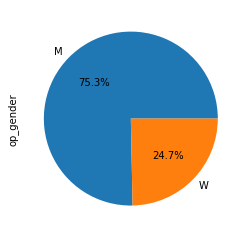

In [11]:
# plot gender
unique_posts.op_gender.value_counts().plot(kind='pie', autopct='%1.1f%%')

# save figure
plt.savefig('images/fbcongress_op_gender.png')

# show plot
plt.show()

In [12]:
# average num responses for everyone
fb_congress_df.post_id.value_counts().mean()

25.560392164729613

In [13]:
# average number of responses per gender

print('average responses when poster is male:', fb_congress_df.groupby('op_gender').post_id.value_counts()['M'].mean())
print('average responses when poster is female:', fb_congress_df.groupby('op_gender').post_id.value_counts()['W'].mean())

average responses when poster is male: 25.473808203655594
average responses when poster is female: 25.824636074780166


Basic analysis conclusion: There are a lot more male posters. Also, the average number of responses doesn't really vary per gender. The information about the post type and op_category is interesting, but doesn't really relate to my current study.

### Analysis of Facebook Wiki

In [14]:
fb_wiki_df.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text
0,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Michelle,Tornado watch in effect tonight. Be safe. Plea...,Is this watch going to make it to LaPorte county?
1,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Melissa,Tornado watch in effect tonight. Be safe. Plea...,Anything for Wilmington area
2,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Darlene,Tornado watch in effect tonight. Be safe. Plea...,"Thanks, please keep us posted."
3,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Cheryl,Tornado watch in effect tonight. Be safe. Plea...,Thanks Byron
4,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Melissa,Tornado watch in effect tonight. Be safe. Plea...,[[STICKER]]


In [15]:
unique_posts = fb_wiki_df.drop_duplicates('post_id')

# different post types, make sure unique for post id
unique_posts.post_type.value_counts()

photo     61411
link      37609
status    33495
video     16026
event       859
note         32
music        16
Name: post_type, dtype: int64

In [16]:
# different op categories, make sure unique for post id
unique_posts.op_category.value_counts()

                                                                   31637
Wikipedia_American_television_actresses                            22822
Wikipedia_American_television_news_anchors                         17925
Wikipedia_American_television_talk_show_hosts                      16607
Wikipedia_American_female_tennis_players                           14855
Wikipedia_American_film_actresses                                  14579
Wikipedia_American_male_film_actors                                12304
Wikipedia_American_television_journalists                          10285
Wikipedia_American_male_television_actors                           3330
Wikipedia_Women_economists                                          2945
Wikipedia_American_male_tennis_players                               957
Wikipedia_21st-century_American_novelists                            792
Wikipedia_Political_analysts                                         338
Wikipedia_Olympic_track_and_field_athletes_of_the_U

In [17]:
# different op genders, make sure unique for post id
unique_posts.op_gender.value_counts()

W    99692
M    49756
Name: op_gender, dtype: int64

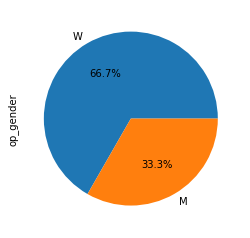

In [18]:
# plot gender
unique_posts.op_gender.value_counts().plot(kind='pie', autopct='%1.1f%%')

# save figure
plt.savefig('images/fbwiki_op_gender.png')

# show plot
plt.show()

In [19]:
# average num responses for everyone
fb_wiki_df.post_id.value_counts().mean()

71.5910350088325

In [20]:
# average number of responses per gender

print('average responses when poster is male:', fb_wiki_df.groupby('op_gender').post_id.value_counts()['M'].mean())
print('average responses when poster is female:', fb_wiki_df.groupby('op_gender').post_id.value_counts()['W'].mean())

average responses when poster is male: 71.25723530830453
average responses when poster is female: 71.75763351121454


Basic analysis conclusion: This file is set up the same as Facebook Congress, so for the same reasons, we only have a figure for op_gender. Again, the average number of responses doesn't really vary between male and female posters.

### Analysis of Fitocracy

In [21]:
fitocracy_df.head()

,post_id,op_id,op_gender,responder_id,responder_gender,post_text,response_text
0,0,102,W,1196122,M,Thanks for the follow! I followed back :) I ...,One day at a time! =]
1,1,104,W,5867,W,I've decided I have this crazy goal of running...,Crazy is synonymous with awesome in this case.
2,2,104,W,1635,M,"Umm, yeah, so those are assisted pull-ups. Bef...",You can enter assisted pullups. Select pullups...
3,3,117,M,8520,W,dam gurl lookin mad tone in dat pp holla bb,"Mirin 3% bodyfat? Yeah, you are."
4,4,117,M,29126,M,What's up there bear mode?,"Hey! I just started a new job, so things are s..."


In [22]:
# make sure post id is unique again
print(fitocracy_df.post_id.nunique())
print(len(fitocracy_df.post_id))

318535
318535


In [23]:
# different op genders
fitocracy_df.op_gender.value_counts()

M    173738
W    144797
Name: op_gender, dtype: int64

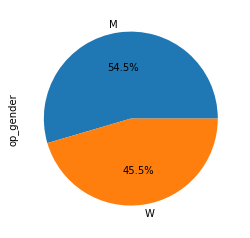

In [24]:
# plot gender
fitocracy_df.op_gender.value_counts().plot(kind='pie', autopct='%1.1f%%')

# save figure
plt.savefig('images/fit_op_gender.png')

# show plot
plt.show()

In [25]:
# different responder genders
fitocracy_df.responder_gender.value_counts()

W    163315
M    155220
Name: responder_gender, dtype: int64

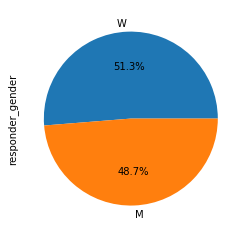

In [26]:
# plot gender
fitocracy_df.responder_gender.value_counts().plot(kind='pie', autopct='%1.1f%%')

# save figure
plt.savefig('images/fit_responder_gender.png')

# show plot
plt.show()

In [27]:
# can't do average number responses per gender - there is only one response per post

# instead, look at how many males respond to males vs. females and how many females respond to males vs. females
fitocracy_df.groupby('op_gender').responder_gender.value_counts()

op_gender  responder_gender
M          W                   94375
           M                   79363
W          M                   75857
           W                   68940
Name: responder_gender, dtype: int64

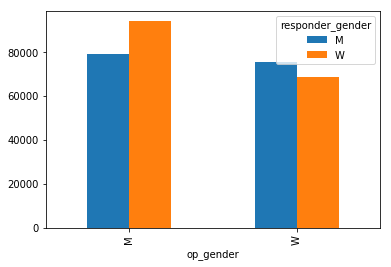

In [28]:
# plot this
fitocracy_df.groupby('op_gender').responder_gender.value_counts().unstack().plot(kind='bar')

# save figure
plt.savefig('images/fit_gender_groupby.png')

# show graph
plt.show()

Basic analysis conclusion: This time, male vs. female posters/responders is much more evenly distributed. Additionally, we can see that when op_gender is male, there are more female responders than male responders and when op_gender is female, there are more male responders than female responders. This is interesting!

### Analysis of Reddit

In [29]:
reddit_df.head()

,post_id,subreddit,op_id,op_gender,op_gender_visible,responder_id,responder_gender,responder_gender_visible,post_text,response_text
0,0,2007scape,Kastoli,M,False,Thunda_Storm,,unknown_gender,slayer task perhaps?,or low level. I mean hes wearing black armour ...
1,1,2007scape,Kastoli,M,False,Thunda_Storm,,unknown_gender,"Black DHide legs, possibly an initiate pure?",So... Low level
2,2,2007scape,DCBizzle,M,False,minixmatt,,unknown_gender,Whats a tonk? lol,"<link> TONK, TONK"
3,3,2007scape,ordona,M,False,Namiweso,,unknown_gender,Do the Stronghold of Security for a free 10k t...,Thanks I forgot about that place! :)
4,4,2007scape,SlayerMaster,M,False,Quantization,,unknown_gender,I cant tell if this guy just doesnt speak Engl...,Or hes just trolling.


In [30]:
# make sure post id is unique again
print(reddit_df.post_id.nunique())
print(len(reddit_df.post_id))

1453512
1453512


In [31]:
# different subreddits
reddit_df.subreddit.value_counts()

AskReddit               344400
AskMen                  133920
politics                 46727
funny                    44761
pics                     42920
relationships            34809
AdviceAnimals            33965
worldnews                33571
todayilearned            32652
nba                      32242
gaming                   27855
news                     27225
nfl                      27194
videos                   26940
WTF                      26682
soccer                   22315
leagueoflegends          22151
CasualConversation       21517
movies                   20567
OkCupid                  18239
CFB                      16025
anime                    15254
europe                   15233
hockey                   14949
Fitness                  14909
teenagers                12809
pcmasterrace             11841
explainlikeimfive        11270
SquaredCircle            11249
technology               11244
                         ...  
xboxone                   2932
heroesof

In [32]:
# different op genders
reddit_df.op_gender.value_counts()

M    1148591
W     304921
Name: op_gender, dtype: int64

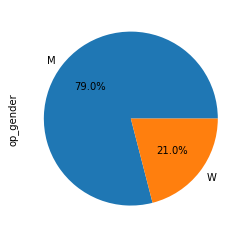

In [33]:
# plot gender
reddit_df.op_gender.value_counts().plot(kind='pie', autopct='%1.1f%%')

# save figure
plt.savefig('images/reddit_op_gender.png')

# show plot
plt.show()

In [34]:
# different responder genders
reddit_df.responder_gender.value_counts()
# blank is unknown

     1320290
M     102530
W      30692
Name: responder_gender, dtype: int64

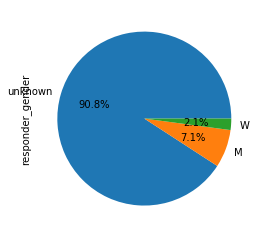

In [35]:
# plot gender
labels = ['unknown','M','W']
reddit_df.responder_gender.value_counts().plot(kind='pie', labels=labels, autopct='%1.1f%%')

# save figure
plt.savefig('images/reddit_responder_gender.png')

# show plot
plt.show()

In [36]:
# look at how many males respond to males vs. females and how many females respond to males vs. females
# eliminating when unknown
reddit_df[reddit_df.responder_gender != ''].groupby('op_gender').responder_gender.value_counts()

op_gender  responder_gender
M          M                   80705
           W                   22883
W          M                   21825
           W                    7809
Name: responder_gender, dtype: int64

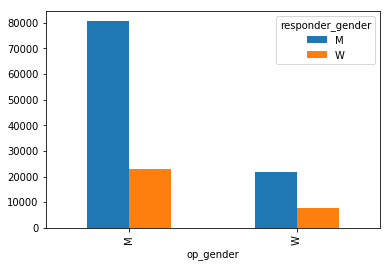

In [37]:
# plot this
reddit_df[reddit_df.responder_gender != ''].groupby('op_gender').responder_gender.value_counts().unstack().plot(kind='bar')

# save figure
plt.savefig('images/reddit_gender_groupby.png')

# show graph
plt.show()

Let's look at male vs. female posters by subreddit and see if we can find any patterns. It was my assumption that maybe there was so much more male posters and responders was because of the prominent AskMen subreddit.

In [38]:
# copying in from another file, but I thought it was important to look at again
subgroups = reddit_df.groupby('subreddit').op_gender.value_counts()
subgroups_df = subgroups.unstack()
subgroups_df.head()

op_gender,M,W
subreddit,,
2007scape,886.0,42.0
AdviceAnimals,25525.0,8440.0
Amd,860.0,19.0
AskMen,110542.0,23378.0
AskOuija,98.0,19.0


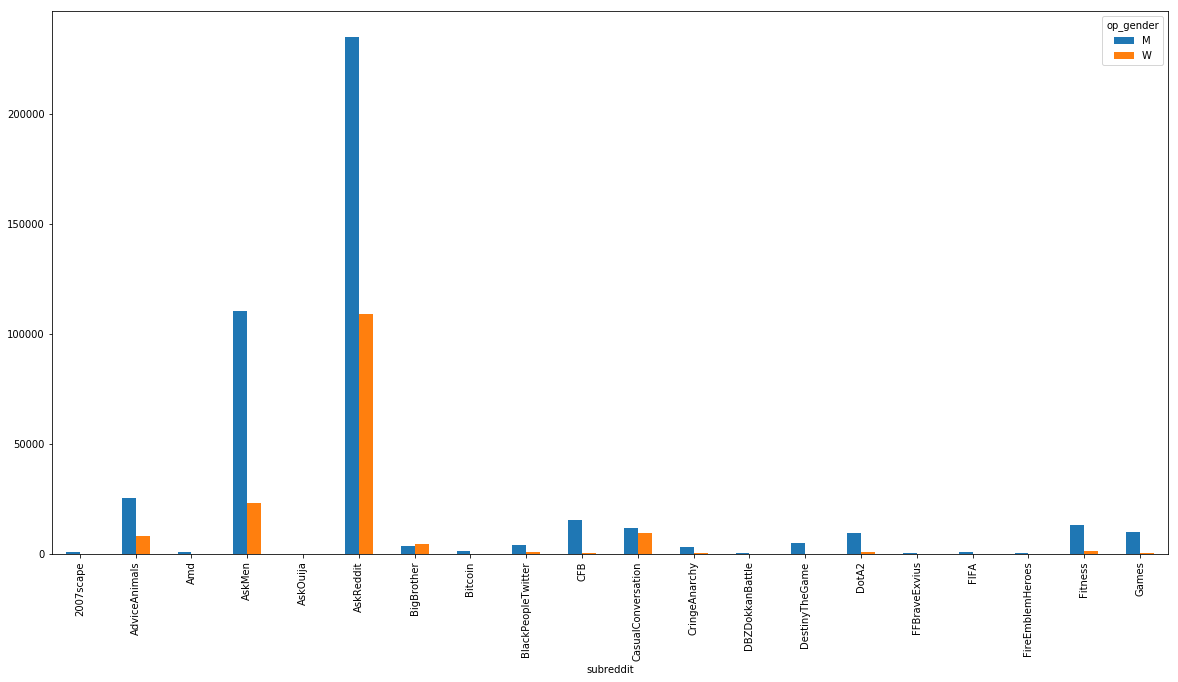

In [39]:
# graph the first 20 subreddits to get some idea
subgroups_df[:20].plot(kind='bar', figsize=(20,10))

# save figure
plt.savefig('images/subreddits.png')

# show graph
plt.show()

So just looking at a flash of the data, 'AskMen' doesn't seem to stand out as a much higher male:female ratio. It seems like most have more male. Maybe Reddit is just a male-dominated site.

Are there any groups where there are more women? From the graph, it looks like the subreddit "BigBrother" has more female posters. Let's see what else...

In [40]:
subgroups_df[subgroups_df.W > subgroups_df.M]

op_gender,M,W
subreddit,,
BigBrother,3564.0,4647.0
aww,4400.0,4597.0
counting,267.0,531.0
relationships,10951.0,23858.0
rupaulsdragrace,153.0,728.0


So with all these subreddits - there are only 5 that have more female than male posters!

Basic analysis conclusion: With this data set, the men seem to dominate the distribution in both posters and responders. Thus, it makes sense that there are more male responders for both male and female posters.

### Analysis of TED

In [41]:
ted_responses_df.head()

,post_id,op_id,op_gender,responder_id,response_text
0,0,Aimee Mullins,W,Laura,"She seems like a truly amazing person, regardl..."
1,1,Aimee Mullins,W,Ellen,"Aimee's true ""disability"" is when people treat..."
2,2,Aimee Mullins,W,Tanya,I love that she took away some of the mystery ...
3,3,Aimee Mullins,W,Salim,VERY inspiring indeed! I love these TED antiqu...
4,4,Aimee Mullins,W,Kiruba,We take running so much for granted that most ...


In [42]:
# different op genders
ted_responses_df.op_gender.value_counts()

M    144336
W     46011
Name: op_gender, dtype: int64

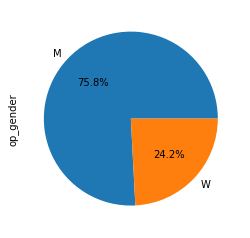

In [43]:
# plot gender
ted_responses_df.op_gender.value_counts().plot(kind='pie', autopct='%1.1f%%')

# save figure
plt.savefig('images/ted_op_gender.png')

# show plot
plt.show()

Basic analysis conclusion: There are a lot more male "posters" than female. Not much else to analyze here...

## Conduct linguistic analysis
Next, we'll look at the actual text. Let's start by conducting some simple linguistic analysis, like token count, sentence length, and TTR.

### Facebook Congress linguistic analysis

In [44]:
# making a smaller sample to do analysis on since it's way too big
# how big again?
fb_congress_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14015811 entries, 0 to 14015810
Data columns (total 9 columns):
post_id          int64
post_type        object
op_id            int64
op_name          object
op_category      object
op_gender        object
responder_id     object
post_text        object
response_text    object
dtypes: int64(2), object(7)
memory usage: 1.0+ GB


In [45]:
fb_congress_df.op_category.value_counts()

Congress_Republican     8886650
Congress_Democratic     4786769
Congress_Independent     193088
                         149304
Name: op_category, dtype: int64

In [46]:
# so there are 14M entries. That's a TON to tokenize. Let's take a sample of 50,000
# exclude when responses don't exist for a post
fb_congress_sample = fb_congress_df[fb_congress_df.response_text != ''].sample(50000)
fb_congress_sample.sort_index(inplace=True)
fb_congress_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text
28,1,video,57265377,Roger Williams,Congress_Republican,M,David,Roses are red...and so is Texas. Let's keep it...,Nah let's vote you out of office you human gar...
135,3,video,57265377,Roger Williams,Congress_Republican,M,Amy,Since President Donald J. Trump was sworn in o...,Are you serious? You want smaller government? ...
249,6,photo,57265377,Roger Williams,Congress_Republican,M,Rick,"In Texas, we honor our military heroes. #Chris...",Just one of our Dedicated American Heros. Than...
255,6,photo,57265377,Roger Williams,Congress_Republican,M,Michael,"In Texas, we honor our military heroes. #Chris...",Such a hero for sniping people in a country th...
713,19,video,57265377,Roger Williams,Congress_Republican,M,Daphne,"Since its inception, Obamacare has been an abs...",No! IF there was an adequate replacement plan ...


In [47]:
# make sure we still have all post types, op categories, and op genders
print(fb_congress_sample.post_type.value_counts())
print(fb_congress_sample.op_category.value_counts())
print(fb_congress_sample.op_gender.value_counts())

link      16912
photo     14461
status     9802
video      8741
event        68
note         13
music         3
Name: post_type, dtype: int64
Congress_Republican     32154
Congress_Democratic     17149
Congress_Independent      697
Name: op_category, dtype: int64
M    37493
W    12507
Name: op_gender, dtype: int64


In [48]:
# use nltk's tokenizer
import nltk

fb_congress_sample['post_tokens'] = fb_congress_sample.post_text.map(nltk.word_tokenize)
fb_congress_sample['response_tokens'] = fb_congress_sample.response_text.map(nltk.word_tokenize)

In [49]:
# find text length
fb_congress_sample['post_length'] = fb_congress_sample.post_tokens.map(len)
fb_congress_sample['response_length'] = fb_congress_sample.response_tokens.map(len)

fb_congress_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text,post_tokens,response_tokens,post_length,response_length
28,1,video,57265377,Roger Williams,Congress_Republican,M,David,Roses are red...and so is Texas. Let's keep it...,Nah let's vote you out of office you human gar...,"[Roses, are, red, ..., and, so, is, Texas, ., ...","[Nah, let, 's, vote, you, out, of, office, you...",23,12
135,3,video,57265377,Roger Williams,Congress_Republican,M,Amy,Since President Donald J. Trump was sworn in o...,Are you serious? You want smaller government? ...,"[Since, President, Donald, J., Trump, was, swo...","[Are, you, serious, ?, You, want, smaller, gov...",69,28
249,6,photo,57265377,Roger Williams,Congress_Republican,M,Rick,"In Texas, we honor our military heroes. #Chris...",Just one of our Dedicated American Heros. Than...,"[In, Texas, ,, we, honor, our, military, heroe...","[Just, one, of, our, Dedicated, American, Hero...",11,14
255,6,photo,57265377,Roger Williams,Congress_Republican,M,Michael,"In Texas, we honor our military heroes. #Chris...",Such a hero for sniping people in a country th...,"[In, Texas, ,, we, honor, our, military, heroe...","[Such, a, hero, for, sniping, people, in, a, c...",11,17
713,19,video,57265377,Roger Williams,Congress_Republican,M,Daphne,"Since its inception, Obamacare has been an abs...",No! IF there was an adequate replacement plan ...,"[Since, its, inception, ,, Obamacare, has, bee...","[No, !, IF, there, was, an, adequate, replacem...",28,81


Let's look at length in a boxplot grouping by gender!

average post length when poster is male: 58.65444216253701
average post length when poster is female: 76.48732709682578


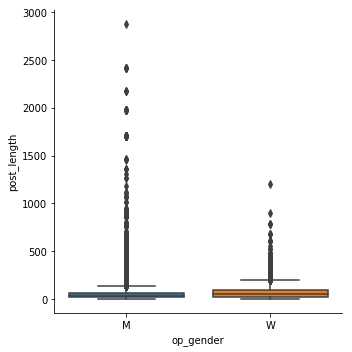

In [50]:
sns.catplot(x='op_gender', y='post_length', kind='box', data=fb_congress_sample)
print('average post length when poster is male:',
      fb_congress_sample[fb_congress_sample.op_gender == 'M'].post_length.mean())
print('average post length when poster is female:',
      fb_congress_sample[fb_congress_sample.op_gender == 'W'].post_length.mean())

So female posters seem to typically have longer posts than male posters! Is this significant?

In [51]:
from scipy import stats

stats.ttest_ind(fb_congress_sample[fb_congress_sample.op_gender == 'M'].post_length,
                fb_congress_sample[fb_congress_sample.op_gender == 'W'].post_length,
                equal_var=False)

Ttest_indResult(statistic=-20.616751023937553, pvalue=9.78413719798422e-94)

Wow, very significant! We can safely conclude female posters have longer posts than male posters.

average response length when poster is male: 31.564852105726402
average response length when poster is female: 32.16071000239866


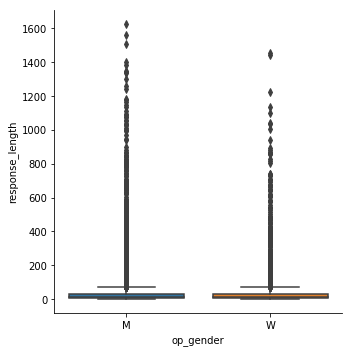

In [52]:
# plot the response length too
sns.catplot(x='op_gender', y='response_length', kind='box', data=fb_congress_sample)

print('average response length when poster is male:',
      fb_congress_sample[fb_congress_sample.op_gender == 'M'].response_length.mean())
print('average response length when poster is female:',
      fb_congress_sample[fb_congress_sample.op_gender == 'W'].response_length.mean())

This time, op_gender doesn't make much of a difference in the length of the responses. Let's not bother doing a t-test here.

Onto sentence length!

In [53]:
# getting sentence lengths
post_sent_count = fb_congress_sample.post_text.map(lambda x: len(nltk.sent_tokenize(x)))
response_sent_count = fb_congress_sample.response_text.map(lambda x: len(nltk.sent_tokenize(x)))

In [54]:
# find average sentence length
post_avg_sent_length = fb_congress_sample.post_length / post_sent_count
response_avg_sent_length = fb_congress_sample.response_length / response_sent_count

# if NaN, set to 0
post_avg_sent_length.fillna(0, inplace=True)
response_avg_sent_length.fillna(0, inplace=True)

In [55]:
# make new columns
fb_congress_sample['post_avg_slen'] = post_avg_sent_length
fb_congress_sample['response_avg_slen'] = response_avg_sent_length

fb_congress_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen
28,1,video,57265377,Roger Williams,Congress_Republican,M,David,Roses are red...and so is Texas. Let's keep it...,Nah let's vote you out of office you human gar...,"[Roses, are, red, ..., and, so, is, Texas, ., ...","[Nah, let, 's, vote, you, out, of, office, you...",23,12,7.666667,12.000000
135,3,video,57265377,Roger Williams,Congress_Republican,M,Amy,Since President Donald J. Trump was sworn in o...,Are you serious? You want smaller government? ...,"[Since, President, Donald, J., Trump, was, swo...","[Are, you, serious, ?, You, want, smaller, gov...",69,28,13.800000,9.333333
249,6,photo,57265377,Roger Williams,Congress_Republican,M,Rick,"In Texas, we honor our military heroes. #Chris...",Just one of our Dedicated American Heros. Than...,"[In, Texas, ,, we, honor, our, military, heroe...","[Just, one, of, our, Dedicated, American, Hero...",11,14,5.500000,7.000000
255,6,photo,57265377,Roger Williams,Congress_Republican,M,Michael,"In Texas, we honor our military heroes. #Chris...",Such a hero for sniping people in a country th...,"[In, Texas, ,, we, honor, our, military, heroe...","[Such, a, hero, for, sniping, people, in, a, c...",11,17,5.500000,17.000000
713,19,video,57265377,Roger Williams,Congress_Republican,M,Daphne,"Since its inception, Obamacare has been an abs...",No! IF there was an adequate replacement plan ...,"[Since, its, inception, ,, Obamacare, has, bee...","[No, !, IF, there, was, an, adequate, replacem...",28,81,9.333333,13.500000


In [56]:
# does gender of poster have an impact on sentence length?
fb_congress_sample.groupby('op_gender')[['post_avg_slen','response_avg_slen']].describe()

post_avg_slen                                                        \
                  count       mean       std  min   25%        50%        75%   
op_gender                                                                       
M               37493.0  16.887424  9.680421  0.0  11.0  16.000000  22.333333   
W               12507.0  18.878306  8.780702  0.0  13.0  18.333333  24.000000   

                 response_avg_slen                                             \
             max             count       mean        std  min  25%  50%   75%   
op_gender                                                                       
M          266.0           37493.0  11.656263  10.715140  1.0  5.0  9.5  15.0   
W          114.0           12507.0  11.783443  10.593755  1.0  5.0  9.5  15.0   

                  
             max  
op_gender         
M          687.0  
W          221.0

In [57]:
# what is this really long sentence?
fb_congress_sample[fb_congress_sample.post_avg_slen == 266.0].post_text.iloc[0]

"I Am Thankful   I am thankful for the tears I shed when joyous and when sad  I am thankful for the laughter especially the times so rough it is all I had    I am thankful for the losses for showing me, even then, I am not defeated I am thankful for my detractors, who even when I win, make sure I don't get conceited     I am thankful for the wounds of past that showed me my capacity to heal I am thankful for frustrations, annoyances, and irritations along the way that showed me I can deal   I am thankful for the honest critics who help me to become wise I am thankful for the haters who challenges me to rise   I am thankful for the storms that have helped me master new skills I am thankful for the scorching fires that have seared away all, revealing invincible will   I am thankful for those who ask for help, for their courage it does teach I am thankful for those who don't wait to be asked to help, theirs is expansive love that fills the grievous breach   I am thankful for our rich dive

Ah... they just don't punctuate.

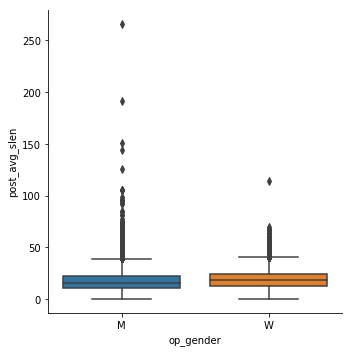

In [58]:
sns.catplot(x='op_gender', y='post_avg_slen', kind='box', data=fb_congress_sample)

Though it's hard to tell on the graph, it seems like female posters may use slightly longer sentences than male posters. Again, the length of the responses doesn't seem to change dependent on the gender of the poster.

Is the fact that female posters use longer sentences significant?

In [59]:
stats.ttest_ind(fb_congress_sample[fb_congress_sample.op_gender == 'M'].post_avg_slen,
                fb_congress_sample[fb_congress_sample.op_gender == 'W'].post_avg_slen,
                equal_var=False)

Ttest_indResult(statistic=-21.38877089217149, pvalue=1.5575217148799405e-100)

This seems strange/random to me, but it is significant that female posters use longer sentences than male posters.

Moving on - what about TTR?

In [60]:
# define TTR
def get_ttr(tokens):
    lower = [w.lower() for w in tokens]
    if len(lower) == 0:   # sometimes there was no text
        return None
    else:
        return len(set(lower))/len(lower)

In [61]:
# add to df
#fb_congress_sample['post_TTR'] = fb_congress_sample.post_tokens.map(get_ttr)
#fb_congress_sample['response_TTR'] = fb_congress_sample.response_tokens.map(get_ttr)
#fb_congress_sample.head()

Commented the above out because: is TTR even useful here? Sometimes the responses are so short that they have a TTR of 1. This doesn't help us.

It doesn't seem to make sense to calculate TTR at all since online posts are pretty short to begin with. TTR isn't very meaningful when there aren't very many words to even look at.

How about average google k-band?

In [62]:
# thanks Na-Rae for this code!

# reading file and setting up
# credit of the Google 1T English unigram frequency list goes to Peter Norbig's site: http://norvig.com/ngrams/
# these files can be used under the MIT license
google_1gram_lines = open('count_1w.txt').readlines()
google_1gram_tup = [tuple(line.split()) for line in google_1gram_lines]
google_1gram_rank = {word:index+1 for (index,(word, count)) in enumerate(google_1gram_tup)}

In [63]:
# thanks Na-Rae for this code!

import math

def get_avg_google_kband(toks):
    """
    Computes the average K-band value from a list of tokens. 
    Limited to 20 K-bands: all words outside top 20,000 are excluded. 
    """
    kbands = []
    for t in toks:
        if t.lower() in google_1gram_rank: 
           grank = google_1gram_rank[t.lower()]
           if grank <= 20000:  # limiting to 20k 
               kband = math.floor(grank/1000)+1
               kbands.append(kband)
               #print(t, grank, kband)
    return np.mean(kbands)

In [64]:
# applying to df
fb_congress_sample['post_avg_kband'] = fb_congress_sample.post_tokens.map(get_avg_google_kband)
fb_congress_sample['response_avg_kband'] = fb_congress_sample.response_tokens.map(get_avg_google_kband)

fb_congress_sample.head()

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen,post_avg_kband,response_avg_kband
28,1,video,57265377,Roger Williams,Congress_Republican,M,David,Roses are red...and so is Texas. Let's keep it...,Nah let's vote you out of office you human gar...,"[Roses, are, red, ..., and, so, is, Texas, ., ...","[Nah, let, 's, vote, you, out, of, office, you...",23,12,7.666667,12.000000,1.562500,2.000000
135,3,video,57265377,Roger Williams,Congress_Republican,M,Amy,Since President Donald J. Trump was sworn in o...,Are you serious? You want smaller government? ...,"[Since, President, Donald, J., Trump, was, swo...","[Are, you, serious, ?, You, want, smaller, gov...",69,28,13.800000,9.333333,2.555556,1.720000
249,6,photo,57265377,Roger Williams,Congress_Republican,M,Rick,"In Texas, we honor our military heroes. #Chris...",Just one of our Dedicated American Heros. Than...,"[In, Texas, ,, we, honor, our, military, heroe...","[Just, one, of, our, Dedicated, American, Hero...",11,14,5.500000,7.000000,2.428571,1.300000
255,6,photo,57265377,Roger Williams,Congress_Republican,M,Michael,"In Texas, we honor our military heroes. #Chris...",Such a hero for sniping people in a country th...,"[In, Texas, ,, we, honor, our, military, heroe...","[Such, a, hero, for, sniping, people, in, a, c...",11,17,5.500000,17.000000,2.428571,3.428571
713,19,video,57265377,Roger Williams,Congress_Republican,M,Daphne,"Since its inception, Obamacare has been an abs...",No! IF there was an adequate replacement plan ...,"[Since, its, inception, ,, Obamacare, has, bee...","[No, !, IF, there, was, an, adequate, replacem...",28,81,9.333333,13.500000,3.227273,1.921875


In [65]:
fb_congress_sample.groupby('op_gender')['post_avg_kband', 'response_avg_kband'].describe()

post_avg_kband                                               \
                   count      mean       std  min       25%       50%   
op_gender                                                               
M                35328.0  2.429961  0.831351  1.0  1.920635  2.314942   
W                12128.0  2.366543  0.689525  1.0  1.928571  2.272727   

                          response_avg_kband                           \
                75%   max              count      mean       std  min   
op_gender                                                               
M          2.750000  20.0            36667.0  2.786300  2.267945  1.0   
W          2.712644  11.0            12254.0  2.733775  2.119071  1.0   

                                     
                25%  50%  75%   max  
op_gender                            
M          1.647059  2.2  3.0  20.0  
W          1.646422  2.2  3.0  20.0

What does this tell us? Not much - the average k-band is about the same for male vs. female posters and in responses to male vs. female posters.

### Facebook Wiki linguistic analysis

In [66]:
# how big is this one again?
fb_wiki_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10699137 entries, 0 to 10699136
Data columns (total 9 columns):
post_id          int64
post_type        object
op_id            int64
op_name          object
op_category      object
op_gender        object
responder_id     object
post_text        object
response_text    object
dtypes: int64(2), object(7)
memory usage: 816.3+ MB


In [67]:
# still too large for my analysis, let's reduce to 50,000 again
# again ignoring when responses don't exist
fb_wiki_sample = fb_wiki_df[fb_wiki_df.response_text != ''].sample(50000)
fb_wiki_sample.sort_index(inplace=True)

In [68]:
# tokenize...
fb_wiki_sample['post_tokens'] = fb_wiki_sample.post_text.map(nltk.word_tokenize)
fb_wiki_sample['response_tokens'] = fb_wiki_sample.response_text.map(nltk.word_tokenize)

# ... and find length
fb_wiki_sample['post_length'] = fb_wiki_sample.post_tokens.map(len)
fb_wiki_sample['response_length'] = fb_wiki_sample.response_tokens.map(len)

fb_wiki_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text,post_tokens,response_tokens,post_length,response_length
27,2,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Bernetta,Temps warming up for the holiday weekend! I wi...,"Thanks, Byron!","[Temps, warming, up, for, the, holiday, weeken...","[Thanks, ,, Byron, !]",20,4
744,80,video,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Stacey,Looking for showers,Do you think enough to activate spotters? Espe...,"[Looking, for, showers]","[Do, you, think, enough, to, activate, spotter...",3,13
1094,112,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Carol,"Can you say #70 degrees?! Well alright then, w...",Byron can we count on mild temps & low winds o...,"[Can, you, say, #, 70, degrees, ?, !, Well, al...","[Byron, can, we, count, on, mild, temps, &, lo...",76,14
1099,113,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,John,Big #temperature swing this week. #Cold start ...,I like it when you have a good forecast!👍,"[Big, #, temperature, swing, this, week, ., #,...","[I, like, it, when, you, have, a, good, foreca...",64,11
1143,122,video,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Melissa,,Nice to c u more often . No more snow 😍,[],"[Nice, to, c, u, more, often, ., No, more, sno...",0,11


average post length when poster is male: 36.99273299824381
average post length when poster is female: 28.965061068474334


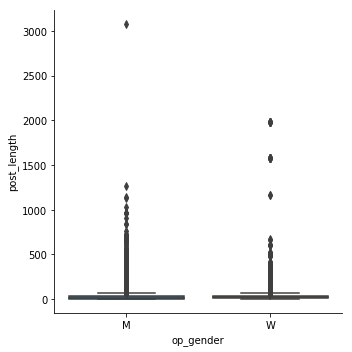

In [69]:
sns.catplot(x='op_gender', y='post_length', kind='box', data=fb_wiki_sample)

print('average post length when poster is male:',
      fb_wiki_sample[fb_wiki_sample.op_gender == 'M'].post_length.mean())
print('average post length when poster is female:',
      fb_wiki_sample[fb_wiki_sample.op_gender == 'W'].post_length.mean())

Interestingly, this is opposite from the Facebook Congress data. This time, the male posters have longer posts. It could also be specific to the sample - I'll have to make sure different samples are consistent to these results. Is this significant?

In [70]:
stats.ttest_ind(fb_wiki_sample[fb_wiki_sample.op_gender == 'M'].post_length,
                fb_wiki_sample[fb_wiki_sample.op_gender == 'W'].post_length,
                equal_var=False)

Ttest_indResult(statistic=12.030211455957208, pvalue=2.9904540867319005e-33)

Yes, still significant. I wonder what's going on here that it's the opposite from the Congress file. Maybe it just comes down to the fact that these are different types of people.

average response length when poster is male: 15.040331859746866
average response length when poster is female: 13.408695911846388


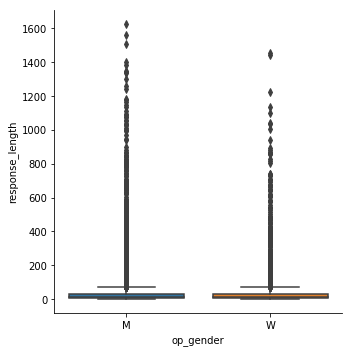

In [71]:
# look at response length again
sns.catplot(x='op_gender', y='response_length', kind='box', data=fb_congress_sample)

print('average response length when poster is male:',
      fb_wiki_sample[fb_wiki_sample.op_gender == 'M'].response_length.mean())
print('average response length when poster is female:',
      fb_wiki_sample[fb_wiki_sample.op_gender == 'W'].response_length.mean())

Again, not a large difference in response length when responding to male vs. female posters. Let's not bother with a t-test here.

In [72]:
# getting sentence lengths
post_sent_count = fb_wiki_sample.post_text.map(lambda x: len(nltk.sent_tokenize(x)))
response_sent_count = fb_wiki_sample.response_text.map(lambda x: len(nltk.sent_tokenize(x)))

In [73]:
# find average sentence length
post_avg_sent_length = fb_wiki_sample.post_length / post_sent_count
response_avg_sent_length = fb_wiki_sample.response_length / response_sent_count

# if NaN, set to 0
post_avg_sent_length.fillna(0, inplace=True)
response_avg_sent_length.fillna(0, inplace=True)

In [74]:
# make new columns
fb_wiki_sample['post_avg_slen'] = post_avg_sent_length
fb_wiki_sample['response_avg_slen'] = response_avg_sent_length

fb_wiki_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen
27,2,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Bernetta,Temps warming up for the holiday weekend! I wi...,"Thanks, Byron!","[Temps, warming, up, for, the, holiday, weeken...","[Thanks, ,, Byron, !]",20,4,6.666667,4.0
744,80,video,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Stacey,Looking for showers,Do you think enough to activate spotters? Espe...,"[Looking, for, showers]","[Do, you, think, enough, to, activate, spotter...",3,13,3.000000,6.5
1094,112,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Carol,"Can you say #70 degrees?! Well alright then, w...",Byron can we count on mild temps & low winds o...,"[Can, you, say, #, 70, degrees, ?, !, Well, al...","[Byron, can, we, count, on, mild, temps, &, lo...",76,14,10.857143,14.0
1099,113,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,John,Big #temperature swing this week. #Cold start ...,I like it when you have a good forecast!👍,"[Big, #, temperature, swing, this, week, ., #,...","[I, like, it, when, you, have, a, good, foreca...",64,11,10.666667,11.0
1143,122,video,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Melissa,,Nice to c u more often . No more snow 😍,[],"[Nice, to, c, u, more, often, ., No, more, sno...",0,11,0.000000,5.5


In [75]:
# does gender of poster have an impact on sentence length?
fb_wiki_sample.groupby('op_gender')[['post_avg_slen','response_avg_slen']].describe()

post_avg_slen                                                   \
                  count       mean       std  min  25%  50%   75%    max   
op_gender                                                                  
M               16513.0  10.456253  8.754565  0.0  5.0  8.5  14.0  154.0   
W               33487.0   9.687997  8.716264  0.0  5.5  9.0  13.0  514.0   

          response_avg_slen                                                  
                      count      mean        std  min  25%  50%  75%    max  
op_gender                                                                    
M                   16513.0  7.498035   8.177272  1.0  3.0  5.0  9.5  181.0  
W                   33487.0  7.251666  10.740649  1.0  2.5  5.0  9.0  784.0

This time, sentence length looks about equal in male vs. female posts, and well as in responses to male vs. female posters. Let's check the significance of average sentence length though, since there is a little difference.

In [76]:
stats.ttest_ind(fb_wiki_sample[fb_wiki_sample.op_gender == 'M'].post_avg_slen,
                fb_wiki_sample[fb_wiki_sample.op_gender == 'W'].post_avg_slen,
                equal_var=False)

Ttest_indResult(statistic=9.241968496687392, pvalue=2.5617355924440667e-20)

Wow - it's still significant! However, this time, male posters have longer sentences than female posters. It seems that this goes along with the post length. By this, I mean that in the Congress file, female posters had longer posts and longer sentences, and in the Wiki file, male posters had longer posts and longer sentences.

In [77]:
# average google k-band
# applying to df
fb_wiki_sample['post_avg_kband'] = fb_wiki_sample.post_tokens.map(get_avg_google_kband)
fb_wiki_sample['response_avg_kband'] = fb_wiki_sample.response_tokens.map(get_avg_google_kband)

fb_wiki_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen,post_avg_kband,response_avg_kband
27,2,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Bernetta,Temps warming up for the holiday weekend! I wi...,"Thanks, Byron!","[Temps, warming, up, for, the, holiday, weeken...","[Thanks, ,, Byron, !]",20,4,6.666667,4.0,2.705882,6.000000
744,80,video,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Stacey,Looking for showers,Do you think enough to activate spotters? Espe...,"[Looking, for, showers]","[Do, you, think, enough, to, activate, spotter...",3,13,3.000000,6.5,3.333333,2.100000
1094,112,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Carol,"Can you say #70 degrees?! Well alright then, w...",Byron can we count on mild temps & low winds o...,"[Can, you, say, #, 70, degrees, ?, !, Well, al...","[Byron, can, we, count, on, mild, temps, &, lo...",76,14,10.857143,14.0,2.465517,4.583333
1099,113,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,John,Big #temperature swing this week. #Cold start ...,I like it when you have a good forecast!👍,"[Big, #, temperature, swing, this, week, ., #,...","[I, like, it, when, you, have, a, good, foreca...",64,11,10.666667,11.0,2.568627,1.222222
1143,122,video,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Melissa,,Nice to c u more often . No more snow 😍,[],"[Nice, to, c, u, more, often, ., No, more, sno...",0,11,0.000000,5.5,NaN,1.333333


In [78]:
fb_wiki_sample.groupby('op_gender')['post_avg_kband', 'response_avg_kband'].describe()

post_avg_kband                                               \
                   count      mean       std  min       25%       50%   
op_gender                                                               
M                14595.0  2.822429  1.854278  1.0  1.833333  2.428571   
W                29162.0  2.632627  1.489319  1.0  1.750000  2.315198   

                          response_avg_kband                           \
                75%   max              count      mean       std  min   
op_gender                                                               
M          3.166667  18.0            14946.0  3.525461  3.320076  1.0   
W          3.060606  19.0            30486.0  3.866439  3.791145  1.0   

                                               
                25%       50%       75%   max  
op_gender                                      
M          1.521739  2.333333  4.000000  20.0  
W          1.571429  2.407407  4.333333  20.0

What does this tell us? Again - not much. The average k-band is about the same for all.

### Fitocracy linguistic analysis

In [79]:
# how big is this?
fitocracy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318535 entries, 0 to 318534
Data columns (total 7 columns):
post_id             318535 non-null int64
op_id               318535 non-null int64
op_gender           318535 non-null object
responder_id        318535 non-null int64
responder_gender    318535 non-null object
post_text           318535 non-null object
response_text       318535 non-null object
dtypes: int64(3), object(4)
memory usage: 19.4+ MB


In [80]:
# again reduce to 50,000
fitocracy_sample = fitocracy_df.sample(50000)
fitocracy_sample.sort_index(inplace=True)

fitocracy_sample.head()

,post_id,op_id,op_gender,responder_id,responder_gender,post_text,response_text
23,23,117,M,26833,M,"Verdict on protein powder sample #1, pea+rice+...",Are you going ovoveggie or something?
26,26,117,M,127640,W,Jesus fuck I love deadlifting.,YEEEEAAAHH
31,31,117,M,26833,M,I need to recruit the refrigerator gnome to sn...,What exactly is a refrigerator gnome?
32,32,117,M,137055,M,With a cat on your face (and some vertical com...,"I am going to respond the Donny Shankle way, b..."
34,34,117,M,91781,M,Your lateral dorsalitis -- hao izit?,"Still healing, though it's a hell of a lot bet..."


So now we have both op gender and responder gender! Let's conduct some linguistic analysis.

In [81]:
# tokenize...
fitocracy_sample['post_tokens'] = fitocracy_sample.post_text.map(nltk.word_tokenize)
fitocracy_sample['response_tokens'] = fitocracy_sample.response_text.map(nltk.word_tokenize)

# ... and find length
fitocracy_sample['post_length'] = fitocracy_sample.post_tokens.map(len)
fitocracy_sample['response_length'] = fitocracy_sample.response_tokens.map(len)

fitocracy_sample.head()

,post_id,op_id,op_gender,responder_id,responder_gender,post_text,response_text,post_tokens,response_tokens,post_length,response_length
23,23,117,M,26833,M,"Verdict on protein powder sample #1, pea+rice+...",Are you going ovoveggie or something?,"[Verdict, on, protein, powder, sample, #, 1, ,...","[Are, you, going, ovoveggie, or, something, ?]",57,7
26,26,117,M,127640,W,Jesus fuck I love deadlifting.,YEEEEAAAHH,"[Jesus, fuck, I, love, deadlifting, .]",[YEEEEAAAHH],6,1
31,31,117,M,26833,M,I need to recruit the refrigerator gnome to sn...,What exactly is a refrigerator gnome?,"[I, need, to, recruit, the, refrigerator, gnom...","[What, exactly, is, a, refrigerator, gnome, ?]",26,7
32,32,117,M,137055,M,With a cat on your face (and some vertical com...,"I am going to respond the Donny Shankle way, b...","[With, a, cat, on, your, face, (, and, some, v...","[I, am, going, to, respond, the, Donny, Shankl...",29,17
34,34,117,M,91781,M,Your lateral dorsalitis -- hao izit?,"Still healing, though it's a hell of a lot bet...","[Your, lateral, dorsalitis, --, hao, izit, ?]","[Still, healing, ,, though, it, 's, a, hell, o...",7,55


In [82]:
fitocracy_sample.groupby('op_gender')['post_length', 'response_length'].describe()

post_length                                                      \
                count       mean        std  min  25%   50%   75%     max   
op_gender                                                                   
M             27376.0  17.072143  18.301679  1.0  7.0  10.0  20.0   576.0   
W             22624.0  18.759680  26.966522  1.0  8.0  11.0  22.0  1840.0   

          response_length                                                     
                    count       mean        std  min  25%   50%   75%    max  
op_gender                                                                     
M                 27376.0  24.475380  28.703835  1.0  6.0  12.0  29.0  291.0  
W                 22624.0  27.619607  31.165872  1.0  6.0  13.0  35.0  407.0

In [83]:
fitocracy_sample.groupby(['op_gender', 'responder_gender'])['response_length'].describe()

count       mean        std  min  25%   50%  \
op_gender responder_gender                                                  
M         M                 12510.0  16.613669  18.738755  1.0  5.0  10.0   
          W                 14866.0  31.091148  33.556192  1.0  6.0  14.0   
W         M                 11871.0  15.774240  18.093749  1.0  5.0  10.0   
          W                 10753.0  40.696550  36.828629  1.0  8.0  22.0   

                             75%    max  
op_gender responder_gender               
M         M                 21.0  291.0  
          W                 54.0  215.0  
W         M                 19.0  352.0  
          W                 86.0  407.0

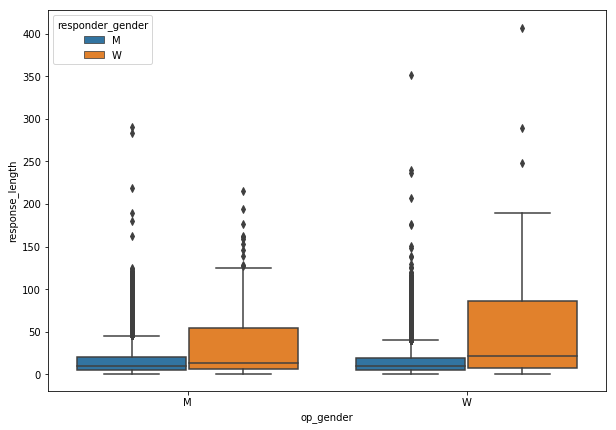

In [84]:
# plot
plt.subplots(figsize=(10,7))
sns.boxplot(x='op_gender', y='response_length', hue='responder_gender', data=fitocracy_sample)

# save figure
plt.savefig('images/fit_response_length_bygender.png')

# show
plt.show()

A lot to analyze here. Let's break this up a little:

#### Post length

Posts by females seem to be a little longer than posts by males.

#### Response length

Overall, responses to female posters seem to be a little longer than responses to male posters. Let's break it down even further:
- Male poster/male responder has shorter responses than male poster/female responder.
- Female poster/male responder has shorter responses than female poster/female responder.

So do female responders always have longer responses than male responders, regardless of the original poster's gender? It seems like it from this quick analysis.

Given this information about post and response length by gender, it seems like (for Fitocracy, at least) female posters and responders generally have longer posts/responses than their male counterparts.

#### Gender x Gender
Male responders have about the same length response when responding to male vs. female posters (responding to male is a little longer), but female responders have longer responses when responding to female than when responding to male.

Is any of this significant?

In [85]:
# t tests

# post length
print('ttest for post length:', stats.ttest_ind(fitocracy_sample[fitocracy_sample.op_gender == 'M'].post_length,
                                                fitocracy_sample[fitocracy_sample.op_gender == 'W'].post_length,
                                                equal_var=False))
print('-----------')

# response length
print('ttest for response length by gender of poster:',
      stats.ttest_ind(fitocracy_sample[fitocracy_sample.op_gender == 'M'].response_length,
                      fitocracy_sample[fitocracy_sample.op_gender == 'W'].response_length,
                      equal_var=False))
print('-----------')

print('ttest for response length by gender of responder:',
      stats.ttest_ind(fitocracy_sample[fitocracy_sample.responder_gender == 'M'].response_length,
                      fitocracy_sample[fitocracy_sample.responder_gender == 'W'].response_length,
                      equal_var=False))
print('-----------')

# gender x gender
print('ttest for male responder:',
      stats.ttest_ind(fitocracy_sample[(fitocracy_sample.responder_gender == 'M') & (fitocracy_sample.op_gender == 'M')].response_length,
                      fitocracy_sample[(fitocracy_sample.responder_gender == 'M') & (fitocracy_sample.op_gender == 'W')].response_length,
                      equal_var=False))
print('-----------')

print('ttest for female responder:',
      stats.ttest_ind(fitocracy_sample[(fitocracy_sample.responder_gender == 'W') & (fitocracy_sample.op_gender == 'M')].response_length,
                      fitocracy_sample[(fitocracy_sample.responder_gender == 'W') & (fitocracy_sample.op_gender == 'W')].response_length,
                      equal_var=False))
print('-----------')

ttest for post length: Ttest_indResult(statistic=-8.010698108852315, pvalue=1.1724259301840741e-15)
-----------
ttest for response length by gender of poster: Ttest_indResult(statistic=-11.635007914603607, pvalue=3.022366238642866e-31)
-----------
ttest for response length by gender of responder: Ttest_indResult(statistic=-75.64974161976642, pvalue=0.0)
-----------
ttest for male responder: Ttest_indResult(statistic=3.5584610833174133, pvalue=0.00037374264734824845)
-----------
ttest for female responder: Ttest_indResult(statistic=-21.37802591325207, pvalue=2.2843298737217477e-100)
-----------


Yay, these are all significant! In summary:
- Female posters have longer posts than male posters
- Reponses to female posters are longer than responses to male posters
- Female responders have longer responses than male responders
- Male responders have longer posts when responding to males than when responding to females
- Female responders have longer responses when responding to females than when responding to males

Let's move on to sentence length:

In [86]:
# getting sentence lengths
post_sent_count = fitocracy_sample.post_text.map(lambda x: len(nltk.sent_tokenize(x)))
response_sent_count = fitocracy_sample.response_text.map(lambda x: len(nltk.sent_tokenize(x)))

In [87]:
# find average sentence length
post_avg_sent_length = fitocracy_sample.post_length / post_sent_count
response_avg_sent_length = fitocracy_sample.response_length / response_sent_count

In [88]:
# make new columns
fitocracy_sample['post_avg_slen'] = post_avg_sent_length
fitocracy_sample['response_avg_slen'] = response_avg_sent_length

fitocracy_sample.head()

,post_id,op_id,op_gender,responder_id,responder_gender,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen
23,23,117,M,26833,M,"Verdict on protein powder sample #1, pea+rice+...",Are you going ovoveggie or something?,"[Verdict, on, protein, powder, sample, #, 1, ,...","[Are, you, going, ovoveggie, or, something, ?]",57,7,19.0,7.0
26,26,117,M,127640,W,Jesus fuck I love deadlifting.,YEEEEAAAHH,"[Jesus, fuck, I, love, deadlifting, .]",[YEEEEAAAHH],6,1,6.0,1.0
31,31,117,M,26833,M,I need to recruit the refrigerator gnome to sn...,What exactly is a refrigerator gnome?,"[I, need, to, recruit, the, refrigerator, gnom...","[What, exactly, is, a, refrigerator, gnome, ?]",26,7,26.0,7.0
32,32,117,M,137055,M,With a cat on your face (and some vertical com...,"I am going to respond the Donny Shankle way, b...","[With, a, cat, on, your, face, (, and, some, v...","[I, am, going, to, respond, the, Donny, Shankl...",29,17,14.5,8.5
34,34,117,M,91781,M,Your lateral dorsalitis -- hao izit?,"Still healing, though it's a hell of a lot bet...","[Your, lateral, dorsalitis, --, hao, izit, ?]","[Still, healing, ,, though, it, 's, a, hell, o...",7,55,7.0,27.5


In [89]:
# summarize again
fitocracy_sample.groupby('op_gender')['post_avg_slen', 'response_avg_slen'].describe()

post_avg_slen                                                      \
                  count      mean        std  min       25%  50%        75%   
op_gender                                                                     
M               27376.0  9.240146   6.532940  1.0  5.333333  8.0  10.750000   
W               22624.0  9.369314  13.045921  1.0  5.500000  8.0  10.333333   

                  response_avg_slen                                           \
              max             count       mean       std  min  25%       50%   
op_gender                                                                      
M           256.0           27376.0   9.995255  8.605949  1.0  4.0  7.000000   
W          1459.0           22624.0  10.593334  9.385905  1.0  4.0  7.333333   

                             
                 75%    max  
op_gender                    
M          12.333333   92.0  
W          13.000000  203.5

In [90]:
fitocracy_sample.groupby(['op_gender', 'responder_gender'])['response_avg_slen'].describe()

count       mean        std  min  25%  \
op_gender responder_gender                                            
M         M                 12510.0   8.401506   6.620951  1.0  4.0   
          W                 14866.0  11.336423   9.775772  1.0  4.0   
W         M                 11871.0   7.817237   5.965039  1.0  4.0   
          W                 10753.0  13.658065  11.321444  1.0  5.0   

                                  50%        75%    max  
op_gender responder_gender                               
M         M                  6.666667  11.000000   82.0  
          W                  7.333333  14.666667   92.0  
W         M                  6.000000  10.000000   85.0  
          W                 10.000000  24.500000  203.5

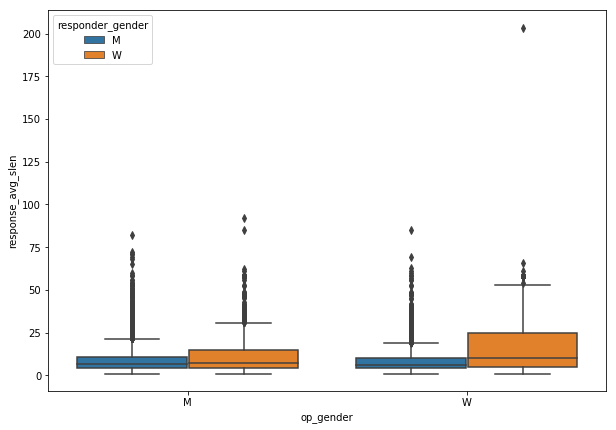

In [91]:
# plot
plt.subplots(figsize=(10,7))
sns.boxplot(x='op_gender', y='response_avg_slen', hue='responder_gender', data=fitocracy_sample)

# save figure
plt.savefig('images/fit_response_slen_bygender.png')

# show
plt.show()

Analyzing sentence length by gender:

#### Post sentence length

Posts by females and males seem to have about the same average sentence length.

#### Response sentence length

Responses to females vs. males seem to have about the same average sentence length, but let's again break it down further:
- Male poster/male responder has shorter sentences in the response than male poster/female responder.
- Female poster/male responder has shorter sentences in the response than female poster/female responder.

Summing that up, it seems like female responders use longer sentences regardless of the original poster's gender.

#### Gender x Gender
Male responders have a little bit longer sentences when responding to a male than when responding to a female, and female responders have a little bit longer sentences when responding to a female than when responding to a male.

Is any of this significant?

In [92]:
# t tests

# post slen
print('ttest for post sentence length:',
      stats.ttest_ind(fitocracy_sample[fitocracy_sample.op_gender == 'M'].post_avg_slen,
                      fitocracy_sample[fitocracy_sample.op_gender == 'W'].post_avg_slen,
                      equal_var=False))
print('-----------')

# response slen
print('ttest for response sentence length by gender of poster:',
      stats.ttest_ind(fitocracy_sample[fitocracy_sample.op_gender == 'M'].response_avg_slen,
                      fitocracy_sample[fitocracy_sample.op_gender == 'W'].response_avg_slen,
                      equal_var=False))
print('-----------')

print('ttest for response sentence length by gender of responder:',
      stats.ttest_ind(fitocracy_sample[fitocracy_sample.responder_gender == 'M'].response_avg_slen,
                      fitocracy_sample[fitocracy_sample.responder_gender == 'W'].response_avg_slen,
                      equal_var=False))
print('-----------')

# gender x gender
print('ttest for male responder:',
      stats.ttest_ind(fitocracy_sample[(fitocracy_sample.responder_gender == 'M') & (fitocracy_sample.op_gender == 'M')].response_avg_slen,
                      fitocracy_sample[(fitocracy_sample.responder_gender == 'M') & (fitocracy_sample.op_gender == 'W')].response_avg_slen,
                      equal_var=False))
print('-----------')

print('ttest for female responder:',
      stats.ttest_ind(fitocracy_sample[(fitocracy_sample.responder_gender == 'W') & (fitocracy_sample.op_gender == 'M')].response_avg_slen,
                      fitocracy_sample[(fitocracy_sample.responder_gender == 'W') & (fitocracy_sample.op_gender == 'W')].response_avg_slen,
                      equal_var=False))

ttest for post sentence length: Ttest_indResult(statistic=-1.3554078288628146, pvalue=0.17529727082071878)
-----------
ttest for response sentence length by gender of poster: Ttest_indResult(statistic=-7.362249998031003, pvalue=1.8382212344081663e-13)
-----------
ttest for response sentence length by gender of responder: Ttest_indResult(statistic=-54.359549987018454, pvalue=0.0)
-----------
ttest for male responder: Ttest_indResult(statistic=7.246124880908871, pvalue=4.4164994772885715e-13)
-----------
ttest for female responder: Ttest_indResult(statistic=-17.139409423199346, pvalue=2.096441630515865e-65)


Most of these are significant! In summary:
- There isn't a significant difference in sentence length for male vs. female posters (EDIT: there wasn't before, when it was run on a different sample. Let's assume there isn't, since the current significance is small anyways)
- Responses to female posters have longer sentences than responses to male posters (but probably by a very small amount! The mean sentence lengths were only different by 0.5...)
- Female responders have longer sentences than male responders
- Male responders have longer sentences when responding to males than when responding to females
- Female responders have longer sentences when responding to females than when responding to males

Onto k-band:

In [93]:
# computing average k-band
fitocracy_sample['post_avg_kband'] = fitocracy_sample.post_tokens.map(get_avg_google_kband)
fitocracy_sample['response_avg_kband'] = fitocracy_sample.response_tokens.map(get_avg_google_kband)

fitocracy_sample.head()

,post_id,op_id,op_gender,responder_id,responder_gender,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen,post_avg_kband,response_avg_kband
23,23,117,M,26833,M,"Verdict on protein powder sample #1, pea+rice+...",Are you going ovoveggie or something?,"[Verdict, on, protein, powder, sample, #, 1, ,...","[Are, you, going, ovoveggie, or, something, ?]",57,7,19.0,7.0,3.750000,1.000000
26,26,117,M,127640,W,Jesus fuck I love deadlifting.,YEEEEAAAHH,"[Jesus, fuck, I, love, deadlifting, .]",[YEEEEAAAHH],6,1,6.0,1.0,2.000000,NaN
31,31,117,M,26833,M,I need to recruit the refrigerator gnome to sn...,What exactly is a refrigerator gnome?,"[I, need, to, recruit, the, refrigerator, gnom...","[What, exactly, is, a, refrigerator, gnome, ?]",26,7,26.0,7.0,3.565217,3.666667
32,32,117,M,137055,M,With a cat on your face (and some vertical com...,"I am going to respond the Donny Shankle way, b...","[With, a, cat, on, your, face, (, and, some, v...","[I, am, going, to, respond, the, Donny, Shankl...",29,17,14.5,8.5,2.590909,2.250000
34,34,117,M,91781,M,Your lateral dorsalitis -- hao izit?,"Still healing, though it's a hell of a lot bet...","[Your, lateral, dorsalitis, --, hao, izit, ?]","[Still, healing, ,, though, it, 's, a, hell, o...",7,55,7.0,27.5,6.000000,1.478261


In [94]:
fitocracy_sample.groupby('op_gender')['post_avg_kband', 'response_avg_kband'].describe()

post_avg_kband                                                      \
                   count      mean       std  min  25%       50%   75%   max   
op_gender                                                                      
M                27151.0  2.406115  1.440242  1.0  1.4  2.071429  3.05  20.0   
W                22470.0  2.288034  1.260206  1.0  1.4  2.000000  3.00  20.0   

          response_avg_kband                                               \
                       count      mean       std  min       25%       50%   
op_gender                                                                   
M                    26507.0  2.372165  2.021615  1.0  1.333333  1.739130   
W                    21896.0  2.271763  1.900971  1.0  1.333333  1.722222   

                           
                75%   max  
op_gender                  
M          2.571429  20.0  
W          2.418605  20.0

In [95]:
fitocracy_sample.groupby(['op_gender','responder_gender'])['response_avg_kband'].describe()

count      mean       std  min       25%  \
op_gender responder_gender                                               
M         M                 12147.0  2.551539  2.207111  1.0  1.333333   
          W                 14360.0  2.220434  1.836696  1.0  1.375000   
W         M                 11418.0  2.390578  2.081814  1.0  1.250000   
          W                 10478.0  2.142288  1.672424  1.0  1.500000   

                                 50%       75%   max  
op_gender responder_gender                            
M         M                 1.933333  2.857143  20.0  
          W                 1.650794  2.333333  20.0  
W         M                 1.800000  2.666667  20.0  
          W                 1.650794  2.128571  20.0

Again, average k-band is about the same for everything.

### Reddit linguistic analysis

In [96]:
# how big is this?
reddit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1453512 entries, 0 to 1453511
Data columns (total 10 columns):
post_id                     1453512 non-null int64
subreddit                   1453512 non-null object
op_id                       1453512 non-null object
op_gender                   1453512 non-null object
op_gender_visible           1453512 non-null bool
responder_id                1453512 non-null object
responder_gender            1453512 non-null object
responder_gender_visible    1453512 non-null object
post_text                   1453512 non-null object
response_text               1453512 non-null object
dtypes: bool(1), int64(1), object(8)
memory usage: 112.3+ MB


In [97]:
# reduce to 50,000 again
reddit_sample = reddit_df.sample(50000)
reddit_sample.sort_index(inplace=True)

reddit_sample.head()

,post_id,subreddit,op_id,op_gender,op_gender_visible,responder_id,responder_gender,responder_gender_visible,post_text,response_text
17,17,2007scape,DCBizzle,M,False,zo1d,,unknown_gender,Where were these guys from again?,jagex
66,66,2007scape,SmellySlutSocket,M,False,MishaMikado,,unknown_gender,Why would anyone care about that?,Favoritism towards streamers
85,85,2007scape,SlayerMaster,M,False,Rn95,,unknown_gender,Being one defense doesnt make you special. If ...,<link> lol
108,108,2007scape,Jorfogit,M,False,KittyMulcher,,unknown_gender,"Chess is not solved yet. However, even reasona...",Magnus Carlsen could tie the best programs som...
212,212,2007scape,Archemiday,M,False,rudyv8,,unknown_gender,Could they make it so that pid is randomized a...,This is valid. It doesnt have to constantly ...


In [98]:
# tokenize...
reddit_sample['post_tokens'] = reddit_sample.post_text.map(nltk.word_tokenize)
reddit_sample['response_tokens'] = reddit_sample.response_text.map(nltk.word_tokenize)

# ... and find length
reddit_sample['post_length'] = reddit_sample.post_tokens.map(len)
reddit_sample['response_length'] = reddit_sample.response_tokens.map(len)

reddit_sample.head()

,post_id,subreddit,op_id,op_gender,op_gender_visible,responder_id,responder_gender,responder_gender_visible,post_text,response_text,post_tokens,response_tokens,post_length,response_length
17,17,2007scape,DCBizzle,M,False,zo1d,,unknown_gender,Where were these guys from again?,jagex,"[Where, were, these, guys, from, again, ?]",[jagex],7,1
66,66,2007scape,SmellySlutSocket,M,False,MishaMikado,,unknown_gender,Why would anyone care about that?,Favoritism towards streamers,"[Why, would, anyone, care, about, that, ?]","[Favoritism, towards, streamers]",7,3
85,85,2007scape,SlayerMaster,M,False,Rn95,,unknown_gender,Being one defense doesnt make you special. If ...,<link> lol,"[Being, one, defense, doesnt, make, you, speci...","[<, link, >, lol]",16,4
108,108,2007scape,Jorfogit,M,False,KittyMulcher,,unknown_gender,"Chess is not solved yet. However, even reasona...",Magnus Carlsen could tie the best programs som...,"[Chess, is, not, solved, yet, ., However, ,, e...","[Magnus, Carlsen, could, tie, the, best, progr...",23,15
212,212,2007scape,Archemiday,M,False,rudyv8,,unknown_gender,Could they make it so that pid is randomized a...,This is valid. It doesnt have to constantly ...,"[Could, they, make, it, so, that, pid, is, ran...","[This, is, valid, ., It, doesnt, have, to, con...",19,31


In [99]:
# summarize
reddit_sample.groupby('op_gender')['post_length', 'response_length'].describe()

post_length                                                       \
                count       mean        std  min   25%   50%   75%     max   
op_gender                                                                    
M             39463.0  39.925297  61.280571  1.0  11.0  22.0  45.0  1909.0   
W             10537.0  46.164848  64.172728  1.0  12.0  26.0  54.0  1913.0   

          response_length                                                       
                    count       mean        std  min   25%   50%   75%     max  
op_gender                                                                       
M                 39463.0  34.116210  52.145062  1.0   9.0  19.0  39.0  1586.0  
W                 10537.0  36.543324  52.562721  1.0  10.0  21.0  44.0  1139.0

In [100]:
reddit_sample[reddit_sample.responder_gender != ''].groupby(['op_gender', 'responder_gender'])['response_length'].describe()

count       mean        std  min   25%   50%  \
op_gender responder_gender                                                  
M         M                 2817.0  35.314519  59.068814  1.0  10.0  20.0   
          W                  797.0  44.607277  61.361951  1.0  12.0  26.0   
W         M                  755.0  42.052980  62.017045  1.0  11.0  25.0   
          W                  275.0  41.200000  48.517286  1.0  11.0  25.0   

                             75%     max  
op_gender responder_gender                
M         M                 40.0  1586.0  
          W                 53.0   670.0  
W         M                 49.0   677.0  
          W                 53.0   429.0

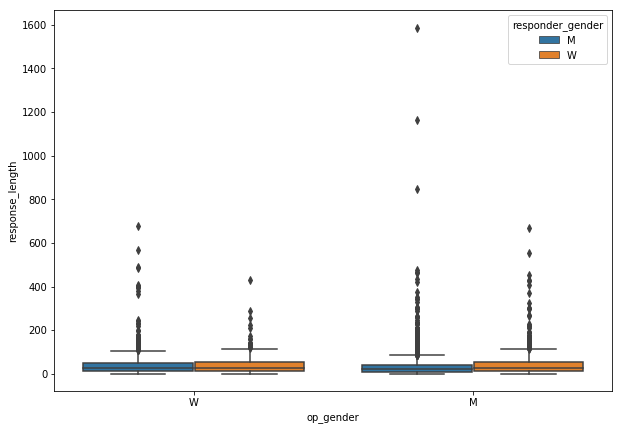

In [101]:
# plot (ignoring when responder gender is unknown)
plt.subplots(figsize=(10,7))
sns.boxplot(x='op_gender', y='response_length', hue='responder_gender', data=reddit_sample[reddit_sample.responder_gender != ''])

# save figure
plt.savefig('images/reddit_response_length_bygender.png')

# show
plt.show()

It's hard to tell from the boxplot, but from looking at the actual data, we can summarize some information:

#### Post length

Female posters seem to typically have longer posts than male posters.

#### Response length

Responses to female posters seem to be a little longer than responses to male posters. Let's dive a little deeper:

- Male poster/male responder has shorter response length than male poster/male responder.
- female poster/male responder has shorter response length than female poster/female responder.

Again, it seems that female responders typically have longer responses than male responders, regardless of the original poster's gender.

#### Gender x Gender

Interestingly (and opposite of our fitocracy data), male responders have longer responses when responding to females than when responding to males. Female responders have longer responses when responding to females than when responding to males.

Is any of this significant?

In [102]:
# t tests

# post length
print('ttest for post length:', stats.ttest_ind(reddit_sample[reddit_sample.op_gender == 'M'].post_length,
                                                reddit_sample[reddit_sample.op_gender == 'W'].post_length,
                                                equal_var=False))
print('-----------')

# response length
print('ttest for response length by gender of poster:',
      stats.ttest_ind(reddit_sample[reddit_sample.op_gender == 'M'].response_length,
                      reddit_sample[reddit_sample.op_gender == 'W'].response_length,
                      equal_var=False))
print('-----------')

print('ttest for response length by gender of responder:',
      stats.ttest_ind(reddit_sample[reddit_sample.responder_gender == 'M'].response_length,
                      reddit_sample[reddit_sample.responder_gender == 'W'].response_length,
                      equal_var=False))
print('-----------')

# gender x gender
print('ttest for male responder:',
      stats.ttest_ind(reddit_sample[(reddit_sample.responder_gender == 'M') & (reddit_sample.op_gender == 'M')].response_length,
                      reddit_sample[(reddit_sample.responder_gender == 'M') & (reddit_sample.op_gender == 'W')].response_length,
                      equal_var=False))
print('-----------')

print('ttest for female responder:',
      stats.ttest_ind(reddit_sample[(reddit_sample.responder_gender == 'W') & (reddit_sample.op_gender == 'M')].response_length,
                      reddit_sample[(reddit_sample.responder_gender == 'W') & (reddit_sample.op_gender == 'W')].response_length,
                      equal_var=False))

ttest for post length: Ttest_indResult(statistic=-8.950372148474107, pvalue=3.9240255310823405e-19)
-----------
ttest for response length by gender of poster: Ttest_indResult(statistic=-4.21799754988505, pvalue=2.4779679531158053e-05)
-----------
ttest for response length by gender of responder: Ttest_indResult(statistic=-3.423490964979096, pvalue=0.0006320890131762446)
-----------
ttest for male responder: Ttest_indResult(statistic=-2.677708539477609, pvalue=0.007518614213319225)
-----------
ttest for female responder: Ttest_indResult(statistic=0.934850210092216, pvalue=0.35024328483669986)


Again, most of these are significant. In summary:
- Female posters have longer posts than male posters
- Responses to female posters are longer than responses to male posters
- Female responders have longer responses than male responders
- Male responders have longer responses when responding to females than when responding to males
- There isn't a significant difference in female response length when responding to males vs. females

Onto sentence length:

In [103]:
# getting sentence lengths
post_sent_count = reddit_sample.post_text.map(lambda x: len(nltk.sent_tokenize(x)))
response_sent_count = reddit_sample.response_text.map(lambda x: len(nltk.sent_tokenize(x)))

In [104]:
# find average sentence length
post_avg_sent_length = reddit_sample.post_length / post_sent_count
response_avg_sent_length = reddit_sample.response_length / response_sent_count

In [105]:
# make new columns
reddit_sample['post_avg_slen'] = post_avg_sent_length
reddit_sample['response_avg_slen'] = response_avg_sent_length

reddit_sample.head()

,post_id,subreddit,op_id,op_gender,op_gender_visible,responder_id,responder_gender,responder_gender_visible,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen
17,17,2007scape,DCBizzle,M,False,zo1d,,unknown_gender,Where were these guys from again?,jagex,"[Where, were, these, guys, from, again, ?]",[jagex],7,1,7.0,1.0
66,66,2007scape,SmellySlutSocket,M,False,MishaMikado,,unknown_gender,Why would anyone care about that?,Favoritism towards streamers,"[Why, would, anyone, care, about, that, ?]","[Favoritism, towards, streamers]",7,3,7.0,3.0
85,85,2007scape,SlayerMaster,M,False,Rn95,,unknown_gender,Being one defense doesnt make you special. If ...,<link> lol,"[Being, one, defense, doesnt, make, you, speci...","[<, link, >, lol]",16,4,8.0,4.0
108,108,2007scape,Jorfogit,M,False,KittyMulcher,,unknown_gender,"Chess is not solved yet. However, even reasona...",Magnus Carlsen could tie the best programs som...,"[Chess, is, not, solved, yet, ., However, ,, e...","[Magnus, Carlsen, could, tie, the, best, progr...",23,15,11.5,15.0
212,212,2007scape,Archemiday,M,False,rudyv8,,unknown_gender,Could they make it so that pid is randomized a...,This is valid. It doesnt have to constantly ...,"[Could, they, make, it, so, that, pid, is, ran...","[This, is, valid, ., It, doesnt, have, to, con...",19,31,19.0,15.5


In [106]:
# what did we find?
reddit_sample.groupby('op_gender')['post_avg_slen', 'response_avg_slen'].describe()

post_avg_slen                                             \
                  count       mean       std  min  25%   50%   75%   
op_gender                                                            
M               39463.0  13.508470  8.268491  1.0  8.0  12.0  17.5   
W               10537.0  13.766008  8.186105  1.0  8.0  12.5  18.0   

                      response_avg_slen                                       \
                  max             count       mean       std  min  25%   50%   
op_gender                                                                      
M          127.333333           39463.0  12.804167  8.634258  1.0  7.0  11.0   
W          154.000000           10537.0  12.938920  8.508107  1.0  7.0  11.5   

                        
            75%    max  
op_gender               
M          17.0  146.0  
W          17.0  165.0

In [107]:
reddit_sample[reddit_sample.responder_gender != ''].groupby(['op_gender', 'responder_gender'])['response_avg_slen'].describe()

count       mean       std  min    25%   50%  \
op_gender responder_gender                                                  
M         M                 2817.0  12.763874  7.925725  1.0  7.000  11.0   
          W                  797.0  13.488756  8.342688  1.0  7.000  12.0   
W         M                  755.0  13.512564  7.758752  1.0  8.000  12.5   
          W                  275.0  13.148716  7.476313  1.0  7.125  12.2   

                                  75%        max  
op_gender responder_gender                        
M         M                 17.000000  72.000000  
          W                 17.666667  55.000000  
W         M                 17.666667  53.000000  
          W                 17.333333  41.333333

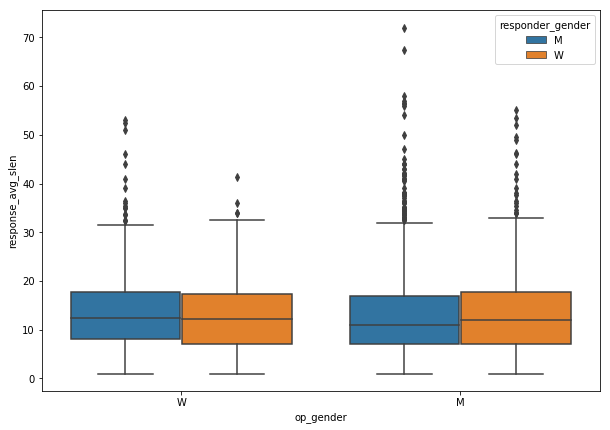

In [108]:
# plot
plt.subplots(figsize=(10,7))
sns.boxplot(x='op_gender', y='response_avg_slen', hue='responder_gender',
            data=reddit_sample[reddit_sample.responder_gender != ''])

# save figure
plt.savefig('images/reddit_response_slen_bygender.png')

# show
plt.show()

What can we figure out from this?

#### Post sentence length

The average sentence length for both female and male posters is about the same.

#### Response sentence length

The average response length responding to both female and male posters is about the same. Also, the gender of the responder doesn't seem to make a difference in average sentence length in any case.

#### Gender x Gender
There doesn't seem to be any significant difference between these, but let's take a look anyway.

Is any of this significant (though the differences are very small)?

In [109]:
# t tests

# post slen
print('ttest for post sentence length:',
      stats.ttest_ind(reddit_sample[reddit_sample.op_gender == 'M'].post_avg_slen,
                      reddit_sample[reddit_sample.op_gender == 'W'].post_avg_slen,
                      equal_var=False))
print('-----------')

# response slen
print('ttest for response sentence length by gender of poster:',
      stats.ttest_ind(reddit_sample[reddit_sample.op_gender == 'M'].response_avg_slen,
                      reddit_sample[reddit_sample.op_gender == 'W'].response_avg_slen,
                      equal_var=False))
print('-----------')

print('ttest for response sentence length by gender of responder:',
      stats.ttest_ind(reddit_sample[reddit_sample.responder_gender == 'M'].response_avg_slen,
                      reddit_sample[reddit_sample.responder_gender == 'W'].response_avg_slen,
                      equal_var=False))
print('-----------')

# gender x gender
print('ttest for male responder:',
      stats.ttest_ind(reddit_sample[(reddit_sample.responder_gender == 'M') & (reddit_sample.op_gender == 'M')].response_avg_slen,
                      reddit_sample[(reddit_sample.responder_gender == 'M') & (reddit_sample.op_gender == 'W')].response_avg_slen,
                      equal_var=False))
print('-----------')

print('ttest for female responder:',
      stats.ttest_ind(reddit_sample[(reddit_sample.responder_gender == 'W') & (reddit_sample.op_gender == 'M')].response_avg_slen,
                      reddit_sample[(reddit_sample.responder_gender == 'W') & (reddit_sample.op_gender == 'W')].response_avg_slen,
                      equal_var=False))

ttest for post sentence length: Ttest_indResult(statistic=-2.862914596531609, pvalue=0.004202851538485358)
-----------
ttest for response sentence length by gender of poster: Ttest_indResult(statistic=-1.4398273193927833, pvalue=0.14993490598868278)
-----------
ttest for response sentence length by gender of responder: Ttest_indResult(statistic=-1.704915727798356, pvalue=0.08839049163806566)
-----------
ttest for male responder: Ttest_indResult(statistic=-2.3438710327632757, pvalue=0.01924597398067542)
-----------
ttest for female responder: Ttest_indResult(statistic=0.6308043496343787, pvalue=0.5284421436857654)


As expected, only a couple significant findings here. In summary:
- Female posters have longer sentences than male posters (though it's not as significant, and as we can see, the difference was very small) (EDIT: with a previous sample it was significant, now it doesn't seem to be)
- There is no significant difference in response length to male vs. female posters (EDIT: with a previous sample it wasn't significant, and now it is, but is still very small)
- Female responders have longer sentences than male responders (though it's not as significant, and as we can see, the difference was very small)
- There is no significant difference in sentence length of male or female responders in response to male vs. female posters (EDIT: with new sample, it's now significant)

Okay, so this is sort of a mess. Everything changed with a different sample. I'm just going to conclude (and stay on the safe side) that none of it is significant, since it changed between samples and was never a very low p-value to begin with.

In [110]:
# computing average k-band
reddit_sample['post_avg_kband'] = reddit_sample.post_tokens.map(get_avg_google_kband)
reddit_sample['response_avg_kband'] = reddit_sample.response_tokens.map(get_avg_google_kband)

reddit_sample.head()

,post_id,subreddit,op_id,op_gender,op_gender_visible,responder_id,responder_gender,responder_gender_visible,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen,post_avg_kband,response_avg_kband
17,17,2007scape,DCBizzle,M,False,zo1d,,unknown_gender,Where were these guys from again?,jagex,"[Where, were, these, guys, from, again, ?]",[jagex],7,1,7.0,1.0,1.333333,NaN
66,66,2007scape,SmellySlutSocket,M,False,MishaMikado,,unknown_gender,Why would anyone care about that?,Favoritism towards streamers,"[Why, would, anyone, care, about, that, ?]","[Favoritism, towards, streamers]",7,3,7.0,3.0,1.166667,3.000000
85,85,2007scape,SlayerMaster,M,False,Rn95,,unknown_gender,Being one defense doesnt make you special. If ...,<link> lol,"[Being, one, defense, doesnt, make, you, speci...","[<, link, >, lol]",16,4,8.0,4.0,2.416667,3.000000
108,108,2007scape,Jorfogit,M,False,KittyMulcher,,unknown_gender,"Chess is not solved yet. However, even reasona...",Magnus Carlsen could tie the best programs som...,"[Chess, is, not, solved, yet, ., However, ,, e...","[Magnus, Carlsen, could, tie, the, best, progr...",23,15,11.5,15.0,2.450000,1.833333
212,212,2007scape,Archemiday,M,False,rudyv8,,unknown_gender,Could they make it so that pid is randomized a...,This is valid. It doesnt have to constantly ...,"[Could, they, make, it, so, that, pid, is, ran...","[This, is, valid, ., It, doesnt, have, to, con...",19,31,19.0,15.5,3.055556,3.266667


In [111]:
reddit_sample.groupby('op_gender')['post_avg_kband', 'response_avg_kband'].describe()

post_avg_kband                                                     \
                   count      mean       std  min   25%       50%       75%   
op_gender                                                                     
M                38998.0  2.533938  1.490592  1.0  1.75  2.238366  2.857143   
W                10440.0  2.440684  1.357184  1.0  1.75  2.186757  2.750000   

                response_avg_kband                                     \
            max              count      mean       std  min       25%   
op_gender                                                               
M          20.0            38840.0  2.546248  1.655153  1.0  1.692308   
W          20.0            10416.0  2.457254  1.518042  1.0  1.671453   

                                     
                50%       75%   max  
op_gender                            
M          2.200000  2.857143  20.0  
W          2.142857  2.750000  20.0

In [112]:
reddit_sample.groupby(['op_gender','responder_gender'])['response_avg_kband'].describe()

count      mean       std  min       25%  \
op_gender responder_gender                                               
M                           35272.0  2.552497  1.669017  1.0  1.692308   
          M                  2775.0  2.482822  1.458679  1.0  1.679416   
          W                   793.0  2.490246  1.678619  1.0  1.740741   
W                            9396.0  2.468694  1.546034  1.0  1.668173   
          M                   750.0  2.331291  1.216964  1.0  1.663655   
          W                   270.0  2.409052  1.252101  1.0  1.747500   

                                 50%       75%   max  
op_gender responder_gender                            
M                           2.200000  2.857143  20.0  
          M                 2.164179  2.800000  18.0  
          W                 2.159091  2.705882  20.0  
W                           2.142857  2.764706  20.0  
          M                 2.092665  2.641234  16.0  
          W                 2.145052  2.675595  10.5

Again, about the same.

### TED linguistic analysis

In [113]:
# how big is this?
ted_responses_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190347 entries, 0 to 190413
Data columns (total 5 columns):
post_id          190347 non-null int64
op_id            190347 non-null object
op_gender        190347 non-null object
responder_id     190347 non-null object
response_text    190347 non-null object
dtypes: int64(1), object(4)
memory usage: 8.7+ MB


In [114]:
# reduce again for consistency (though I think this would be possible to handle anyways)
ted_sample = ted_responses_df.sample(50000)
ted_sample.sort_index(inplace=True)

In [115]:
# tokenize...
ted_sample['response_tokens'] = ted_sample.response_text.map(nltk.word_tokenize)

# ... and find length
ted_sample['response_length'] = ted_sample.response_tokens.map(len)

ted_sample.head()

,post_id,op_id,op_gender,responder_id,response_text,response_tokens,response_length
4,4,Aimee Mullins,W,Kiruba,We take running so much for granted that most ...,"[We, take, running, so, much, for, granted, th...",72
13,13,Aimee Mullins,W,Manoj,"It's 2.30am on 12/28/11, I was feeling very do...","[It, 's, 2.30am, on, 12/28/11, ,, I, was, feel...",128
19,19,Aimee Mullins,W,Jennifer,Aimee is my inspiration for starting running. ...,"[Aimee, is, my, inspiration, for, starting, ru...",16
24,24,Aimee Mullins,W,Vicky,i read her story from the magazine of Crazy En...,"[i, read, her, story, from, the, magazine, of,...",44
25,25,Aimee Mullins,W,Thaddee,"So great ,it's deep as story This makes me spe...","[So, great, ,, it, 's, deep, as, story, This, ...",13


average response length when "poster" is male: 93.70422830762774
average response length when "poster" is female: 91.37739979791175


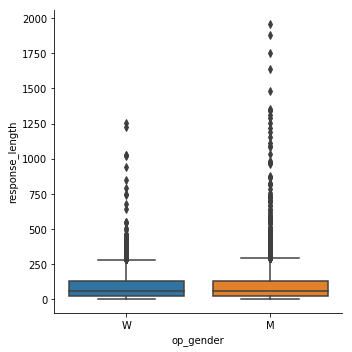

In [116]:
sns.catplot(x='op_gender', y='response_length', kind='box', data=ted_sample)

print('average response length when "poster" is male:',
      ted_sample[ted_sample.op_gender == 'M'].response_length.mean())
print('average response length when "poster" is female:',
      ted_sample[ted_sample.op_gender == 'W'].response_length.mean())

It seems responses are a little longer when the speaker is male than when they are female. Let's look at some more detail:

In [117]:
ted_sample.groupby('op_gender')['response_length'].describe()

,count,mean,std,min,25%,50%,75%,max
op_gender,,,,,,,,
M,38124.0,93.704228,98.010633,1.0,25.0,61.0,132.0,1960.0
W,11876.0,91.377400,93.427767,1.0,25.0,61.0,128.0,1253.0


In [118]:
# is this significant? do some t tests

stats.ttest_ind(ted_sample[ted_sample.op_gender == 'M'].response_length,
                ted_sample[ted_sample.op_gender == 'W'].response_length,
                equal_var=False)

Ttest_indResult(statistic=2.342149419908589, pvalue=0.019182482939044506)

If we go by the standard that a p-value of below 0.05 is significant, then we can conclude the difference in response length to male vs. female speakers is not significant. (EDIT: with a new sample, it is significant).

Again, we run into an issue with discrepencies between samples. It's probably easier to conclude that there is no significant difference in response length given op_gender.

Let's look at sentence length:

In [119]:
# getting sentence lengths
response_sent_count = ted_sample.response_text.map(lambda x: len(nltk.sent_tokenize(x)))

In [120]:
# find average sentence length
response_avg_sent_length = ted_sample.response_length / response_sent_count

In [121]:
# make new column
ted_sample['response_avg_slen'] = response_avg_sent_length

ted_sample.head()

,post_id,op_id,op_gender,responder_id,response_text,response_tokens,response_length,response_avg_slen
4,4,Aimee Mullins,W,Kiruba,We take running so much for granted that most ...,"[We, take, running, so, much, for, granted, th...",72,18.000000
13,13,Aimee Mullins,W,Manoj,"It's 2.30am on 12/28/11, I was feeling very do...","[It, 's, 2.30am, on, 12/28/11, ,, I, was, feel...",128,42.666667
19,19,Aimee Mullins,W,Jennifer,Aimee is my inspiration for starting running. ...,"[Aimee, is, my, inspiration, for, starting, ru...",16,8.000000
24,24,Aimee Mullins,W,Vicky,i read her story from the magazine of Crazy En...,"[i, read, her, story, from, the, magazine, of,...",44,44.000000
25,25,Aimee Mullins,W,Thaddee,"So great ,it's deep as story This makes me spe...","[So, great, ,, it, 's, deep, as, story, This, ...",13,13.000000


In [122]:
# summarize
ted_sample.groupby('op_gender')['response_avg_slen'].describe()

,count,mean,std,min,25%,50%,75%,max
op_gender,,,,,,,,
M,38124.0,18.494614,14.175804,1.0,11.333333,16.848077,23.000000,1309.0
W,11876.0,18.250940,13.470584,1.0,11.000000,16.555556,22.555556,445.0


Sentence length seems to be about the same whether they are responding to a male vs. a female speaker. Let's not bother doing a ttest here.

In [123]:
# add average google k-band
ted_sample['response_avg_kband'] = ted_sample.response_tokens.map(get_avg_google_kband)

ted_sample.head()

,post_id,op_id,op_gender,responder_id,response_text,response_tokens,response_length,response_avg_slen,response_avg_kband
4,4,Aimee Mullins,W,Kiruba,We take running so much for granted that most ...,"[We, take, running, so, much, for, granted, th...",72,18.000000,1.777778
13,13,Aimee Mullins,W,Manoj,"It's 2.30am on 12/28/11, I was feeling very do...","[It, 's, 2.30am, on, 12/28/11, ,, I, was, feel...",128,42.666667,2.160000
19,19,Aimee Mullins,W,Jennifer,Aimee is my inspiration for starting running. ...,"[Aimee, is, my, inspiration, for, starting, ru...",16,8.000000,1.692308
24,24,Aimee Mullins,W,Vicky,i read her story from the magazine of Crazy En...,"[i, read, her, story, from, the, magazine, of,...",44,44.000000,1.675676
25,25,Aimee Mullins,W,Thaddee,"So great ,it's deep as story This makes me spe...","[So, great, ,, it, 's, deep, as, story, This, ...",13,13.000000,1.111111


In [124]:
ted_sample.groupby('op_gender')['response_avg_kband'].describe()

,count,mean,std,min,25%,50%,75%,max
op_gender,,,,,,,,
M,37866.0,2.256397,0.969046,1.0,1.785714,2.106195,2.489796,20.0
W,11777.0,2.281413,1.035461,1.0,1.795322,2.115044,2.500000,20.0


And once again, the google k-band doesn't really differ between genders.

## Linguistic difference in gender

Now let's get to some specifics! What about the content of someone's speech/writing makes it more likely for them to be male vs. female? There are some basic differences that have been noted, that I found in *Women, Men, and Language: A sociolinguistic account of gender differences in language*, by Jennifer Coates. There are a lot of differences that Coates discusses regarding gendered speak. Some only apply to actual speech, which is irrelevant in this case, and some require more exchanges other than a simple post/response. I'm gathering a short list of differences that I think would be manageable to investigate for my project:

- Hedges: Hedges express uncertainty, and overall, women seem to use more hedges than men. Some examples of hedges include I think, I guess, I mean, kind of, I’m sure, you know, sort of, perhaps, etc.
- Compliments: It was found that women give and receive more compliments than men. In a study of 484 exchanges of compliments, 51% were woman to woman, 9% were man to man, 23.1% were man to woman, and 16.5% were woman to man. This could also be related to politeness.
- Questions: Typically, women use questions to "avoid the role of expert," found in phrases such as "do you?", "aren't there?", "isn't it?", "right?", etc. On the other hand, men use questions to seek new information or introduce a new topic.

Let's look at the presence of these in our sample files.

In [125]:
# list of hedges
hedges = ['i think', 'i guess', 'i mean', 'kind of', "i'm sure", 'you know', 'sort of', 'perhaps']

# create function
def find_hedges(text):
    text = text.lower()
    num = 0
    for hedge in hedges:
        num = num + text.count(hedge)
    return num

In [126]:
# test function
print(find_hedges('I guess!'))
print(find_hedges('I think you know that I sort of'))
print(find_hedges("Perhaps I'm SURE"))

1
3
2


In [127]:
# unsure how to find compliments

# let's just look at a few examples of questions specific to females
# used to have 'right' but it seemed to be skewing the data
# and people use it too often for it to really qualify as a question
questions = ['do you?', "don't you?", "aren't there?", "isn't it?"]

# create function
def find_questions(text):
    text = text.lower()
    num = 0
    for ques in questions:
        num = num + text.count(ques)
    return num

In [128]:
# test function
print(find_questions("I like this don't you?"))
print(find_questions('rIGHT???'))
print(find_questions("This is cool, isn't it? I like this, do you?"))

1
0
2


### Facebook Congress

#### Hedges

In [129]:
# hedges in facebook congress (since we don't know responder gender, hedges for them don't really matter)
fb_congress_sample['post_hedges'] = fb_congress_sample.post_text.map(find_hedges)

fb_congress_sample.groupby('op_gender')['post_hedges'].describe()

,count,mean,std,min,25%,50%,75%,max
op_gender,,,,,,,,
M,37493.0,0.030459,0.219065,0.0,0.0,0.0,0.0,7.0
W,12507.0,0.046294,0.241966,0.0,0.0,0.0,0.0,3.0


In [130]:
# male posters with hedges
male_hedges = fb_congress_sample[(fb_congress_sample.op_gender == 'M') & (fb_congress_sample.post_hedges != 0)]

# female posters with hedges
female_hedges = fb_congress_sample[(fb_congress_sample.op_gender == 'W') & (fb_congress_sample.post_hedges != 0)]

print('percentage male posters with hedges:',
      len(male_hedges.index) / fb_congress_sample.op_gender.value_counts()['M'])

print('percentage female posters with hedges:',
      len(female_hedges.index) / fb_congress_sample.op_gender.value_counts()['W'])

percentage male posters with hedges: 0.024831301843010696
percentage female posters with hedges: 0.039258015511313665


So there seems to be a little more hedges in posts from women! Is this significant?

In [131]:
stats.ttest_ind(fb_congress_sample[fb_congress_sample.op_gender == 'M'].post_hedges,
                fb_congress_sample[fb_congress_sample.op_gender == 'W'].post_hedges,
                equal_var=False)

Ttest_indResult(statistic=-6.4856730368174045, pvalue=9.042578343908137e-11)

Cool - so even though hedges, aren't present that often, this is still statistically significant that females use more hedges than males!

#### Questions

In [132]:
fb_congress_sample['post_questions'] = fb_congress_sample.post_text.map(find_questions)

fb_congress_sample.groupby('op_gender')['post_questions'].describe()

,count,mean,std,min,25%,50%,75%,max
op_gender,,,,,,,,
M,37493.0,0.000507,0.022506,0.0,0.0,0.0,0.0,1.0
W,12507.0,0.000480,0.021898,0.0,0.0,0.0,0.0,1.0


In [133]:
# male posters with questions
male_questions = fb_congress_sample[(fb_congress_sample.op_gender == 'M') & (fb_congress_sample.post_questions != 0)]

# female posters with questions
female_questions = fb_congress_sample[(fb_congress_sample.op_gender == 'W') & (fb_congress_sample.post_questions != 0)]

print('percentage male posters with questions:',
      len(male_questions.index) / fb_congress_sample.op_gender.value_counts()['M'])

print('percentage female posters with questions:',
      len(female_questions.index) / fb_congress_sample.op_gender.value_counts()['W'])

percentage male posters with questions: 0.000506761262102259
percentage female posters with questions: 0.0004797313504437515


In [134]:
stats.ttest_ind(fb_congress_sample[fb_congress_sample.op_gender == 'M'].post_questions,
                fb_congress_sample[fb_congress_sample.op_gender == 'W'].post_questions,
                equal_var=False)

Ttest_indResult(statistic=0.11870378020511074, pvalue=0.9055111271951091)

### Facebook Wiki

#### Hedges

In [135]:
# hedges in facebook wiki
fb_wiki_sample['post_hedges'] = fb_wiki_sample.post_text.map(find_hedges)

fb_wiki_sample.groupby('op_gender')['post_hedges'].describe()

,count,mean,std,min,25%,50%,75%,max
op_gender,,,,,,,,
M,16513.0,0.038939,0.239605,0.0,0.0,0.0,0.0,5.0
W,33487.0,0.019351,0.147998,0.0,0.0,0.0,0.0,3.0


In [136]:
# male posters with hedges
male_hedges = fb_wiki_sample[(fb_wiki_sample.op_gender == 'M') & (fb_wiki_sample.post_hedges != 0)]

# female posters with hedges
female_hedges = fb_wiki_sample[(fb_wiki_sample.op_gender == 'W') & (fb_wiki_sample.post_hedges != 0)]

print('percentage male posters with hedges:',
      len(male_hedges.index) / fb_wiki_sample.op_gender.value_counts()['M'])

print('percentage female posters with hedges:',
      len(female_hedges.index) / fb_wiki_sample.op_gender.value_counts()['W'])

percentage male posters with hedges: 0.03173257433537213
percentage female posters with hedges: 0.018006987786305134


This time, male posters seem to have more hedges. Is this significant though?

In [137]:
stats.ttest_ind(fb_wiki_sample[fb_wiki_sample.op_gender == 'M'].post_hedges,
                fb_wiki_sample[fb_wiki_sample.op_gender == 'W'].post_hedges,
                equal_var=False)

Ttest_indResult(statistic=9.637831240609833, pvalue=6.091610236941995e-22)

Yes - it is significant that male posters in fb_wiki_sample use more hedges than female posters. So this contradicts my hypothesis :(

#### Questions

In [138]:
fb_wiki_sample['post_questions'] = fb_wiki_sample.post_text.map(find_questions)

fb_wiki_sample.groupby('op_gender')['post_questions'].describe()

,count,mean,std,min,25%,50%,75%,max
op_gender,,,,,,,,
M,16513.0,0.000727,0.026948,0.0,0.0,0.0,0.0,1.0
W,33487.0,0.000209,0.019702,0.0,0.0,0.0,0.0,2.0


In [139]:
# male posters with questions
male_questions = fb_wiki_sample[(fb_wiki_sample.op_gender == 'M') & (fb_wiki_sample.post_questions != 0)]

# female posters with questions
female_questions = fb_wiki_sample[(fb_wiki_sample.op_gender == 'W') & (fb_wiki_sample.post_questions != 0)]

print('percentage male posters with questions:',
      len(male_questions.index) / fb_wiki_sample.op_gender.value_counts()['M'])

print('percentage female posters with questions:',
      len(female_questions.index) / fb_wiki_sample.op_gender.value_counts()['W'])

percentage male posters with questions: 0.0007267001756192091
percentage female posters with questions: 0.00011944933854928778


In [140]:
stats.ttest_ind(fb_wiki_sample[fb_wiki_sample.op_gender == 'M'].post_questions,
                fb_wiki_sample[fb_wiki_sample.op_gender == 'W'].post_questions,
                equal_var=False)

Ttest_indResult(statistic=2.1959691958649477, pvalue=0.02810312454153408)

### Fitocracy

#### Hedges

In [141]:
# hedges in fitocracy
fitocracy_sample['post_hedges'] = fitocracy_sample.post_text.map(find_hedges)
fitocracy_sample['response_hedges'] = fitocracy_sample.response_text.map(find_hedges)

print(fitocracy_sample.groupby('op_gender')['post_hedges'].describe())
print(fitocracy_sample.groupby('responder_gender')['response_hedges'].describe())

             count      mean       std  min  25%  50%  75%  max
op_gender                                                      
M          27376.0  0.026227  0.169142  0.0  0.0  0.0  0.0  2.0
W          22624.0  0.029703  0.179145  0.0  0.0  0.0  0.0  3.0
                    count      mean       std  min  25%  50%  75%  max
responder_gender                                                      
M                 24381.0  0.034535  0.190518  0.0  0.0  0.0  0.0  3.0
W                 25619.0  0.027323  0.173017  0.0  0.0  0.0  0.0  3.0


In [142]:
# male posters with hedges
male_hedges_post = fitocracy_sample[(fitocracy_sample.op_gender == 'M') & (fitocracy_sample.post_hedges != 0)]
# male responders with hedges
male_hedges_response = fitocracy_sample[(fitocracy_sample.responder_gender == 'M') & (fitocracy_sample.response_hedges != 0)]

# female posters with hedges
female_hedges_post = fitocracy_sample[(fitocracy_sample.op_gender == 'W') & (fitocracy_sample.post_hedges != 0)]
# female responders with hedges
female_hedges_response = fitocracy_sample[(fitocracy_sample.responder_gender == 'W') & (fitocracy_sample.response_hedges != 0)]

print('percentage male posters with hedges:',
      len(male_hedges_post.index) / fitocracy_sample.op_gender.value_counts()['M'])

print('percentage female posters with hedges:',
      len(female_hedges_post.index) / fitocracy_sample.op_gender.value_counts()['W'])

print('percentage male responders with hedges:',
      len(male_hedges_response.index) / fitocracy_sample.responder_gender.value_counts()['M'])

print('percentage female responders with hedges:',
      len(female_hedges_response.index) / fitocracy_sample.responder_gender.value_counts()['W'])

percentage male posters with hedges: 0.024693161893629457
percentage female posters with hedges: 0.028155940594059407
percentage male responders with hedges: 0.03318157581723473
percentage female responders with hedges: 0.025684062609781802


This time, female posters have more hedges than male posters, but male responders have more hedges than female responders. Is this significant?

In [143]:
print('ttest for hedges in posts:',
      stats.ttest_ind(fitocracy_sample[fitocracy_sample.op_gender == 'M'].post_hedges,
                      fitocracy_sample[fitocracy_sample.op_gender == 'W'].post_hedges,
                      equal_var=False))
print('----------')
      
print('ttest for hedges in responses:',
      stats.ttest_ind(fitocracy_sample[fitocracy_sample.op_gender == 'M'].response_hedges,
                      fitocracy_sample[fitocracy_sample.op_gender == 'W'].response_hedges,
                      equal_var=False))

ttest for hedges in posts: Ttest_indResult(statistic=-2.214365421834258, pvalue=0.02680842028026695)
----------
ttest for hedges in responses: Ttest_indResult(statistic=1.075416907861153, pvalue=0.2821934618618041)


Thus, it is significant that female posters use more hedges than male posters (EDIT: with a new sample, this p-value has changed and is no longer significant). There is no significance in difference of hedges between male and female responders though, so this doesn't contradict my hypothesis.

Again, to be on the safe side, since the significance changed between samples, we should say that neither of these are significant.

#### Questions

In [144]:
# questions in fitocracy
fitocracy_sample['post_questions'] = fitocracy_sample.post_text.map(find_questions)
fitocracy_sample['response_questions'] = fitocracy_sample.response_text.map(find_questions)

print(fitocracy_sample.groupby('op_gender')['post_questions'].describe())
print(fitocracy_sample.groupby('responder_gender')['response_questions'].describe())

             count      mean       std  min  25%  50%  75%  max
op_gender                                                      
M          27376.0  0.000183  0.013514  0.0  0.0  0.0  0.0  1.0
W          22624.0  0.000177  0.013296  0.0  0.0  0.0  0.0  1.0
                    count      mean       std  min  25%  50%  75%  max
responder_gender                                                      
M                 24381.0  0.000287  0.016942  0.0  0.0  0.0  0.0  1.0
W                 25619.0  0.000625  0.024983  0.0  0.0  0.0  0.0  1.0


In [145]:
# male posters with questions
male_questions_post = fitocracy_sample[(fitocracy_sample.op_gender == 'M') &
                                       (fitocracy_sample.post_questions != 0)]
# male responders with questions
male_questions_response = fitocracy_sample[(fitocracy_sample.responder_gender == 'M') &
                                           (fitocracy_sample.response_questions != 0)]

# female posters with questions
female_questions_post = fitocracy_sample[(fitocracy_sample.op_gender == 'W') &
                                         (fitocracy_sample.post_questions != 0)]
# female responders with questions
female_questions_response = fitocracy_sample[(fitocracy_sample.responder_gender == 'W') &
                                             (fitocracy_sample.response_questions != 0)]

print('percentage male posters with questions:',
      len(male_questions_post.index) / fitocracy_sample.op_gender.value_counts()['M'])

print('percentage female posters with questions:',
      len(female_questions_post.index) / fitocracy_sample.op_gender.value_counts()['W'])

print('percentage male responders with questions:',
      len(male_questions_response.index) / fitocracy_sample.responder_gender.value_counts()['M'])

print('percentage female responders with questions:',
      len(female_questions_response.index) / fitocracy_sample.responder_gender.value_counts()['W'])

percentage male posters with questions: 0.0001826417299824664
percentage female posters with questions: 0.0001768033946251768
percentage male responders with questions: 0.0002871088142405972
percentage female responders with questions: 0.0006245364768336


In [146]:
print('ttest for questions in posts:',
      stats.ttest_ind(fitocracy_sample[fitocracy_sample.op_gender == 'M'].post_questions,
                      fitocracy_sample[fitocracy_sample.op_gender == 'W'].post_questions,
                      equal_var=False))
print('----------')
      
print('ttest for questions in responses:',
      stats.ttest_ind(fitocracy_sample[fitocracy_sample.op_gender == 'M'].response_questions,
                      fitocracy_sample[fitocracy_sample.op_gender == 'W'].response_questions,
                      equal_var=False))

ttest for questions in posts: Ttest_indResult(statistic=0.04851075619418309, pvalue=0.9613093920144095)
----------
ttest for questions in responses: Ttest_indResult(statistic=0.5966093905783529, pvalue=0.5507709128946208)


### Reddit

#### Hedges

In [147]:
# hedges in reddit
reddit_sample['post_hedges'] = reddit_sample.post_text.map(find_hedges)
reddit_sample['response_hedges'] = reddit_sample.response_text.map(find_hedges)

print(reddit_sample.groupby('op_gender')['post_hedges'].describe())
print(reddit_sample.groupby('responder_gender')['response_hedges'].describe())

             count      mean       std  min  25%  50%  75%  max
op_gender                                                      
M          39463.0  0.105770  0.366289  0.0  0.0  0.0  0.0  7.0
W          10537.0  0.129544  0.408268  0.0  0.0  0.0  0.0  4.0
                    count      mean       std  min  25%  50%  75%  max
responder_gender                                                      
                  45356.0  0.106491  0.366544  0.0  0.0  0.0  0.0  6.0
M                  3572.0  0.120101  0.433631  0.0  0.0  0.0  0.0  9.0
W                  1072.0  0.166045  0.483571  0.0  0.0  0.0  0.0  5.0


In [148]:
# male posters with hedges
male_hedges_post = reddit_sample[(reddit_sample.op_gender == 'M') & (reddit_sample.post_hedges != 0)]
# male responders with hedges
male_hedges_response = reddit_sample[(reddit_sample.responder_gender == 'M') & (reddit_sample.response_hedges != 0)]

# female posters with hedges
female_hedges_post = reddit_sample[(reddit_sample.op_gender == 'W') & (reddit_sample.post_hedges != 0)]
# female responders with hedges
female_hedges_response = reddit_sample[(reddit_sample.responder_gender == 'W') & (reddit_sample.response_hedges != 0)]

print('percentage male posters with hedges:',
      len(male_hedges_post.index) / reddit_sample.op_gender.value_counts()['M'])

print('percentage female posters with hedges:',
      len(female_hedges_post.index) / reddit_sample.op_gender.value_counts()['W'])

print('percentage male responders with hedges:',
      len(male_hedges_response.index) / reddit_sample.responder_gender.value_counts()['M'])

print('percentage female responders with hedges:',
      len(female_hedges_response.index) / reddit_sample.responder_gender.value_counts()['W'])

percentage male posters with hedges: 0.09130071205939741
percentage female posters with hedges: 0.10790547594191895
percentage male responders with hedges: 0.09574468085106383
percentage female responders with hedges: 0.13152985074626866


This is what we like to see! In both categories (poster and responder), women use more hedges. Is this significant?

In [149]:
print('ttest for hedges in posts:',
      stats.ttest_ind(reddit_sample[reddit_sample.op_gender == 'M'].post_hedges,
                      reddit_sample[reddit_sample.op_gender == 'W'].post_hedges,
                      equal_var=False))
print('----------')
      
print('ttest for hedges in responses:',
      stats.ttest_ind(reddit_sample[reddit_sample.op_gender == 'M'].response_hedges,
                      reddit_sample[reddit_sample.op_gender == 'W'].response_hedges,
                      equal_var=False))

ttest for hedges in posts: Ttest_indResult(statistic=-5.422910466703101, pvalue=5.952251958102396e-08)
----------
ttest for hedges in responses: Ttest_indResult(statistic=-5.5250383258668, pvalue=3.348973226197285e-08)


Yay- both significant! For both posts and responses, female use more hedges than males. So my hypothesis is supported once more!

#### Questions

In [150]:
# questions in reddit
reddit_sample['post_questions'] = reddit_sample.post_text.map(find_questions)
reddit_sample['response_questions'] = reddit_sample.response_text.map(find_questions)

print(reddit_sample.groupby('op_gender')['post_questions'].describe())
print(reddit_sample.groupby('responder_gender')['response_questions'].describe())

             count      mean       std  min  25%  50%  75%  max
op_gender                                                      
M          39463.0  0.000405  0.021353  0.0  0.0  0.0  0.0  2.0
W          10537.0  0.000475  0.021779  0.0  0.0  0.0  0.0  1.0
                    count      mean       std  min  25%  50%  75%  max
responder_gender                                                      
                  45356.0  0.000265  0.016264  0.0  0.0  0.0  0.0  1.0
M                  3572.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
W                  1072.0  0.000933  0.030542  0.0  0.0  0.0  0.0  1.0


In [151]:
# male posters with questions
male_questions_post = reddit_sample[(reddit_sample.op_gender == 'M') &
                                       (reddit_sample.post_questions != 0)]
# male responders with questions
male_questions_response = reddit_sample[(reddit_sample.responder_gender == 'M') &
                                           (reddit_sample.response_questions != 0)]

# female posters with questions
female_questions_post = reddit_sample[(reddit_sample.op_gender == 'W') &
                                         (reddit_sample.post_questions != 0)]
# female responders with questions
female_questions_response = reddit_sample[(reddit_sample.responder_gender == 'W') &
                                             (reddit_sample.response_questions != 0)]

print('percentage male posters with questions:',
      len(male_questions_post.index) / reddit_sample.op_gender.value_counts()['M'])

print('percentage female posters with questions:',
      len(female_questions_post.index) / reddit_sample.op_gender.value_counts()['W'])

print('percentage male responders with questions:',
      len(male_questions_response.index) / reddit_sample.responder_gender.value_counts()['M'])

print('percentage female responders with questions:',
      len(female_questions_response.index) / reddit_sample.responder_gender.value_counts()['W'])

percentage male posters with questions: 0.00038010288117983933
percentage female posters with questions: 0.0004745183638606814
percentage male responders with questions: 0.0
percentage female responders with questions: 0.0009328358208955224


In [152]:
print('ttest for questions in posts:',
      stats.ttest_ind(reddit_sample[reddit_sample.op_gender == 'M'].post_questions,
                      reddit_sample[reddit_sample.op_gender == 'W'].post_questions,
                      equal_var=False))
print('----------')
      
print('ttest for questions in responses:',
      stats.ttest_ind(reddit_sample[reddit_sample.op_gender == 'M'].response_questions,
                      reddit_sample[reddit_sample.op_gender == 'W'].response_questions,
                      equal_var=False))

ttest for questions in posts: Ttest_indResult(statistic=-0.290419970385441, pvalue=0.7714986506546477)
----------
ttest for questions in responses: Ttest_indResult(statistic=-0.7413183056436468, pvalue=0.4585128192224801)


Lastly, we can't do our hedge analysis on our last file (TED) because the gender isn't listed for the responder.

## Machine Learning
Let's gather everything I want for machine learning!

I have two goals:
1. I want to analyze the text, regardless of whether it's poster or responder, and train to identify gender. To do this, I'll use my samples from before and combine them to suit my purpose.

In [153]:
# we don't know gender for responder in fb congress, only gather post data
fb_congress_posts_sample = fb_congress_sample[['op_gender', 'post_text','post_length','post_avg_slen',
                                               'post_hedges','post_questions']]

# we don't know gender for responder in fb wiki, only gather post data
fb_wiki_posts_sample = fb_wiki_sample[['op_gender', 'post_text','post_length','post_avg_slen',
                                       'post_hedges','post_questions']]

# we know gender for poster and responder in fitocracy
fit_posts_sample = fitocracy_sample[['op_gender', 'post_text','post_length','post_avg_slen','post_hedges',
                                     'post_questions']]
fit_responses_sample = fitocracy_sample[['responder_gender', 'response_text','response_length',
                                         'response_avg_slen','response_hedges','response_questions']]

# we know gender for poster and some responders in reddit
reddit_posts_sample = reddit_sample[['op_gender', 'post_text','post_length','post_avg_slen','post_hedges',
                                     'post_questions']]
reddit_responses_sample = reddit_sample[reddit_sample.responder_gender != ''][['responder_gender','response_text',
                                                                               'response_length','response_avg_slen',
                                                                               'response_hedges','response_questions']]

# we don't know gender for responder in TED

In [154]:
# merge them

# first, change column names
columns = ['gender', 'text', 'text_length', 'avg_slen', 'hedges', 'questions']
fb_congress_posts_sample.columns = columns
fb_wiki_posts_sample.columns = columns
fit_posts_sample.columns = columns
fit_responses_sample.columns = columns
reddit_posts_sample.columns = columns
reddit_responses_sample.columns = columns

# add source column
fb_congress_posts_sample['source'] = 'fb_congress_post'
fb_wiki_posts_sample['source'] = 'fb_wiki_post'
fit_posts_sample['source'] = 'fitocracy_post'
fit_responses_sample['source'] = 'fitocracy_response'
reddit_posts_sample['source'] = 'reddit_post'
reddit_responses_sample['source'] = 'reddit_response'

# facebook files will have duplicates because they have multiple responses per post
fb_congress_posts_sample = fb_congress_posts_sample.drop_duplicates()
fb_wiki_posts_sample = fb_wiki_posts_sample.drop_duplicates()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.ht

In [155]:
# now merge them
all_posts_responses = pd.concat([fb_congress_posts_sample, fb_wiki_posts_sample, fit_posts_sample,
                                 fit_responses_sample, reddit_posts_sample, reddit_responses_sample],
                                ignore_index=True)

all_posts_responses.head()

,gender,text,text_length,avg_slen,hedges,questions,source
0,M,Roses are red...and so is Texas. Let's keep it...,23,7.666667,0,0,fb_congress_post
1,M,Since President Donald J. Trump was sworn in o...,69,13.800000,0,0,fb_congress_post
2,M,"In Texas, we honor our military heroes. #Chris...",11,5.500000,0,0,fb_congress_post
3,M,"Since its inception, Obamacare has been an abs...",28,9.333333,0,0,fb_congress_post
4,M,Shameful.,2,2.000000,0,0,fb_congress_post


In [156]:
all_posts_responses.source.value_counts()

fitocracy_response    50000
reddit_post           50000
fitocracy_post        50000
fb_congress_post      27499
fb_wiki_post          19123
reddit_response        4644
Name: source, dtype: int64

Seems like it's merged well! Let's pickle it!

In [157]:
import pickle

all_posts_responses.to_pickle("all_posts_responses.pkl")

2. For deeper analysis, I want to focus on when we know the gender of the OP and the responder so I can analyze how people respond to different genders. Which files will work for this?
    - Fitocracy: genders are present for all posters/responders
    - Reddit: genders are present for all posters and only some responders

Looks like only two files. How big are these?

In [158]:
fitocracy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318535 entries, 0 to 318534
Data columns (total 7 columns):
post_id             318535 non-null int64
op_id               318535 non-null int64
op_gender           318535 non-null object
responder_id        318535 non-null int64
responder_gender    318535 non-null object
post_text           318535 non-null object
response_text       318535 non-null object
dtypes: int64(3), object(4)
memory usage: 19.4+ MB


In [159]:
# getting rid of when we don't know responder's gender
# want op gender to be visible so we know the responder is aware of what gender they are replying to
reddit_gender_visible = reddit_df[(reddit_df.responder_gender != '') & (reddit_df.op_gender_visible == True)]
reddit_gender_visible.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78231 entries, 51026 to 1314987
Data columns (total 10 columns):
post_id                     78231 non-null int64
subreddit                   78231 non-null object
op_id                       78231 non-null object
op_gender                   78231 non-null object
op_gender_visible           78231 non-null bool
responder_id                78231 non-null object
responder_gender            78231 non-null object
responder_gender_visible    78231 non-null object
post_text                   78231 non-null object
response_text               78231 non-null object
dtypes: bool(1), int64(1), object(8)
memory usage: 6.0+ MB


How should we merge these?

Both have columns for post_id, op_id, op_gender, responder_id, responder_gender, post_text, and response_text. Additionally, the Reddit data also has a column for subreddit, op_gender_visible, and responder_gender_visible. These probably don't matter for what I want to do with machine learning though - I'm more interested in the actual text. So let's delete these columns from reddit_df. Let's also add a 'source' column so we can tell where they came from when it's merged:

In [160]:
fitocracy_df['source'] = 'fitocracy'
fitocracy_df.head()

,post_id,op_id,op_gender,responder_id,responder_gender,post_text,response_text,source
0,0,102,W,1196122,M,Thanks for the follow! I followed back :) I ...,One day at a time! =],fitocracy
1,1,104,W,5867,W,I've decided I have this crazy goal of running...,Crazy is synonymous with awesome in this case.,fitocracy
2,2,104,W,1635,M,"Umm, yeah, so those are assisted pull-ups. Bef...",You can enter assisted pullups. Select pullups...,fitocracy
3,3,117,M,8520,W,dam gurl lookin mad tone in dat pp holla bb,"Mirin 3% bodyfat? Yeah, you are.",fitocracy
4,4,117,M,29126,M,What's up there bear mode?,"Hey! I just started a new job, so things are s...",fitocracy


In [161]:
reddit_gender_visible = reddit_gender_visible.drop(labels=['subreddit','op_gender_visible','responder_gender_visible'], axis=1)
reddit_gender_visible['source'] = 'reddit'
reddit_gender_visible.head()

,post_id,op_id,op_gender,responder_id,responder_gender,post_text,response_text,source
51026,51026,Uphoria,M,QuixoticChemist,W,I agree with this. most guys wont think twice ...,I think theyre are a few males in my lab this ...,reddit
51028,51028,Uphoria,M,MobileD,M,I honestly wouldnt. There are two things to c...,Basically this. I would recommend holding off...,reddit
51029,51029,satinbirdy,W,ninjarxa,M,Such a classic question! Im not a guy but Ive ...,whenever you make contact with another person ...,reddit
51030,51030,phukka,M,BroccoliFarts,W,"If its a guy that you might see often, a co-wo...",He is a coworker but I only work with him thre...,reddit
51031,51031,BroccoliFarts,W,phukka,M,He is a coworker but I only work with him thre...,"Also, watch how he interacts with his other co...",reddit


In [162]:
gender_visible_df = pd.concat([fitocracy_df, reddit_gender_visible], ignore_index=True)

# let's drop the post id column too and just use the index as post id
gender_visible_df.drop(labels=['post_id'], axis=1, inplace=True)

gender_visible_df.head()

,op_id,op_gender,responder_id,responder_gender,post_text,response_text,source
0,102,W,1196122,M,Thanks for the follow! I followed back :) I ...,One day at a time! =],fitocracy
1,104,W,5867,W,I've decided I have this crazy goal of running...,Crazy is synonymous with awesome in this case.,fitocracy
2,104,W,1635,M,"Umm, yeah, so those are assisted pull-ups. Bef...",You can enter assisted pullups. Select pullups...,fitocracy
3,117,M,8520,W,dam gurl lookin mad tone in dat pp holla bb,"Mirin 3% bodyfat? Yeah, you are.",fitocracy
4,117,M,29126,M,What's up there bear mode?,"Hey! I just started a new job, so things are s...",fitocracy


In [163]:
gender_visible_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396766 entries, 0 to 396765
Data columns (total 7 columns):
op_id               396766 non-null object
op_gender           396766 non-null object
responder_id        396766 non-null object
responder_gender    396766 non-null object
post_text           396766 non-null object
response_text       396766 non-null object
source              396766 non-null object
dtypes: object(7)
memory usage: 21.2+ MB


In [164]:
# now let's do the same linguistic calculations to this df
# not including k-band, because when we did it above, there were no noticeable differences between genders

# tokenize...
gender_visible_df['post_tokens'] = gender_visible_df.post_text.map(nltk.word_tokenize)
gender_visible_df['response_tokens'] = gender_visible_df.response_text.map(nltk.word_tokenize)

# ... and find length
gender_visible_df['post_length'] = gender_visible_df.post_tokens.map(len)
gender_visible_df['response_length'] = gender_visible_df.response_tokens.map(len)

In [165]:
# getting sentence lengths
post_sent_count = gender_visible_df.post_text.map(lambda x: len(nltk.sent_tokenize(x)))
response_sent_count = gender_visible_df.response_text.map(lambda x: len(nltk.sent_tokenize(x)))

# find average sentence length
post_avg_sent_length = gender_visible_df.post_length / post_sent_count
response_avg_sent_length = gender_visible_df.response_length / response_sent_count

# make new columns
gender_visible_df['post_avg_slen'] = post_avg_sent_length
gender_visible_df['response_avg_slen'] = response_avg_sent_length

In [166]:
# adding column for hedges
gender_visible_df['post_hedges'] = gender_visible_df.post_text.map(find_hedges)
gender_visible_df['response_hedges'] = gender_visible_df.response_text.map(find_hedges)

# adding column for questions
gender_visible_df['post_questions'] = gender_visible_df.post_text.map(find_questions)
gender_visible_df['response_questions'] = gender_visible_df.response_text.map(find_questions)

gender_visible_df.head()

,op_id,op_gender,responder_id,responder_gender,post_text,response_text,source,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen,post_hedges,response_hedges,post_questions,response_questions
0,102,W,1196122,M,Thanks for the follow! I followed back :) I ...,One day at a time! =],fitocracy,"[Thanks, for, the, follow, !, I, followed, bac...","[One, day, at, a, time, !, =, ]]",25,8,12.5,4.000000,0,0,0,0
1,104,W,5867,W,I've decided I have this crazy goal of running...,Crazy is synonymous with awesome in this case.,fitocracy,"[I, 've, decided, I, have, this, crazy, goal, ...","[Crazy, is, synonymous, with, awesome, in, thi...",13,9,13.0,9.000000,0,0,0,0
2,104,W,1635,M,"Umm, yeah, so those are assisted pull-ups. Bef...",You can enter assisted pullups. Select pullups...,fitocracy,"[Umm, ,, yeah, ,, so, those, are, assisted, pu...","[You, can, enter, assisted, pullups, ., Select...",19,57,9.5,11.400000,0,0,0,0
3,117,M,8520,W,dam gurl lookin mad tone in dat pp holla bb,"Mirin 3% bodyfat? Yeah, you are.",fitocracy,"[dam, gurl, lookin, mad, tone, in, dat, pp, ho...","[Mirin, 3, %, bodyfat, ?, Yeah, ,, you, are, .]",10,10,10.0,5.000000,0,0,0,0
4,117,M,29126,M,What's up there bear mode?,"Hey! I just started a new job, so things are s...",fitocracy,"[What, 's, up, there, bear, mode, ?]","[Hey, !, I, just, started, a, new, job, ,, so,...",7,26,7.0,8.666667,0,0,0,0


In [167]:
# look at some of the hedges
samples = gender_visible_df[gender_visible_df.response_hedges != 0].sample(5)

for index, row in samples.iterrows():
    print('text:', row.response_text)
    print('number of hedges:', row.response_hedges)
    print('gender:', row.responder_gender)
    print('--------------')

text: it was whipped cream icing.  i guess i will have to get another cake to sample a real icing? #foreverbulking
number of hedges: 1
gender: M
--------------
text: > And I think hes right in that. Porn is focused on male pleasure. Like he pointed out, the blowjob portion of a scene typically lasts longer than the cunnilingus portion of a scene. There is almost always a close up of the man cumming on or in the woman as proof that he orgasmed, even if the actor didnt actually orgasm.  Alright. I already said what I had to say regarding that in reply to when he/she said the same thing, so theres not much else to do here.
number of hedges: 1
gender: M
--------------
text: > Would you not ignore someone you made moves on who youd otherwise never have spoken too? I think so.  Well, yeah, so it means they dont find me attractive as in, theyd never even have spoken to me if not for alcohol?
number of hedges: 1
gender: W
--------------
text: i guess theres only one way to find out. ;)
number 

In [168]:
# look at some of the questions
samples = gender_visible_df[gender_visible_df.response_questions != 0].sample(5)

for index, row in samples.iterrows():
    print('text:', row.response_text)
    print('number of questions:', row.response_questions)
    print('gender:', row.responder_gender)
    print('--------------')

text: O_O .... is this a trick? Will this message self destruct if I click it? OMGOGG!!! Where the heck have you been?! Dude drama isn't it? No matter what the case, glad to have you back!!! HolyShiz I still can't believe it...<.<   >.>O.OBTW, I'm fantastic! 4 scores and 7 profile pictures ago... *ahem* As you can see, I've completed this year's Tough Mudder. The most fun I've ever had believe it or not.
number of questions: 1
gender: M
--------------
text: Yea bro do you?
number of questions: 1
gender: W
--------------
text: It's getting a little warm for earmuffs, isn't it? ^_^
number of questions: 1
gender: M
--------------
text: Just read about that. Nice to be pushed by someone, isn't it?
number of questions: 1
gender: M
--------------
text: Oh man I hear that... It's hard to go without working out isn't it? I'm in the same boat.
number of questions: 1
gender: M
--------------


Now that we've done all this work - let's pickle the dataframe! I'm going to create a new file for the machine learning and reopen the dataframe there.

In [169]:
gender_visible_df.to_pickle("gender_visible_df.pkl")